In [1]:
import gym

In [2]:
# Filter tensorflow version warnings
import os
# https://stackoverflow.com/questions/40426502/is-there-a-way-to-suppress-the-messages-tensorflow-prints/40426709
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import warnings
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

In [3]:
from gym.envs.box2d import CarRacing
from stable_baselines.common.vec_env import DummyVecEnv

In [4]:
#std env from Mike
if __name__=='__main__':
    env0 = lambda :  CarRacing(
        grayscale=1,   #1   2 es green, modif propia
        show_info_panel=0,
        discretize_actions="hard",
        frames_per_state=4,
        num_lanes=1,
        num_tracks=1,
        )
    
    #env = getattr(environments, env)
    env0 = DummyVecEnv([env0])

    obs = env0.reset()

Track generation: 1024..1294 -> 270-tiles track


In [5]:
print(env0.action_space)
print(env0.observation_space)
print(obs.shape)

Discrete(5)
Box(96, 96, 4)
(1, 96, 96, 4)


In [6]:
try:
    print(env0.action_space.high)
    print(env0.action_space.low)
except:
    print('discrete')
    print(env0.action_space.sample(),env0.action_space.sample(),env0.action_space.sample())    

discrete
4 0 3


0 176


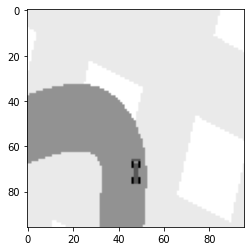

In [7]:
from matplotlib import pyplot as plt
plt.imshow(obs[0,:,:,0], cmap='gray')
print(min([min(r) for r in obs[0,:,:,0]]), max([max(r) for r in obs[0,:,:,0]]))

In [8]:
env0.close()

In [9]:
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, CnnLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2 #, PPO1


In [10]:
#training env
frames=4

if __name__=='__main__':
    env1 = lambda :  CarRacing(
        grayscale=1,
        show_info_panel=0,
        discretize_actions="hard",
        frames_per_state=frames,
        num_lanes=1,
        num_tracks=1,
        max_time_out=1.0,
        max_step_reward=1,
        allow_outside=True,
        )


In [11]:
# multiprocess environment
paralelo=1

if paralelo==1:
    env1 = DummyVecEnv([env1])
    #env1 = gym.make(env1)
else:
    env1 = make_vec_env(env1, n_envs=paralelo)

obs = env1.reset()
print(obs.shape)

Track generation: 1192..1494 -> 302-tiles track
(1, 96, 96, 4)


In [12]:
updates=1000

batch=400
model = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)

model.learn(total_timesteps=updates*batch*paralelo)


Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1078..1351 -> 273-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1062..1336 -> 274-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1010..1266 -> 256-tiles track
done by time
Track generation: 1042..1309 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1201..1505 -> 304-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1006..1267

done by time
Track generation: 1191..1494 -> 303-tiles track
-------------------------------------
| approxkl           | 0.0042380737 |
| clipfrac           | 0.050624996  |
| explained_variance | 0.0013       |
| fps                | 12           |
| n_updates          | 7            |
| policy_entropy     | 1.5696411    |
| policy_loss        | -0.005714075 |
| serial_timesteps   | 2800         |
| time_elapsed       | 155          |
| total_timesteps    | 2800         |
| value_loss         | 1440.7258    |
-------------------------------------
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1121..1405 -> 284-tiles track
done by time
Track generation: 1147..1445 -> 298-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1122..1407 -> 285-tiles track
done by time
Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track

done by time
Track generation: 1296..1624 -> 328-tiles track
done by time
Track generation: 1184..1491 -> 307-tiles track
done by time
Track generation: 1243..1558 -> 315-tiles track
-------------------------------------
| approxkl           | 0.0020932565 |
| clipfrac           | 0.0          |
| explained_variance | 0.0179       |
| fps                | 21           |
| n_updates          | 18           |
| policy_entropy     | 1.4618651    |
| policy_loss        | -0.005229202 |
| serial_timesteps   | 7200         |
| time_elapsed       | 360          |
| total_timesteps    | 7200         |
| value_loss         | 359.60785    |
-------------------------------------
done by time
Track generation: 1364..1709 -> 345-tiles track
-------------------------------------
| approxkl           | 0.0021869156 |
| clipfrac           | 0.011875     |
| explained_variance | -0.0249      |
| fps                | 27           |
| n_updates          | 19           |
| policy_entropy     | 1.3985149  

done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
--------------------------------------
| approxkl           | 0.0051747523  |
| clipfrac           | 0.060624998   |
| explained_variance | 0.185         |
| fps                | 25            |
| n_updates          | 31            |
| policy_entropy     | 1.3557436     |
| policy_loss        | -0.0057017813 |
| serial_timesteps   | 12400         |
| time_elapsed       | 572           |
| total_timesteps    | 12400         |
| value_loss         | 159.10664     |
--------------------------------------
done by time
Track generation: 1078..1352 -> 274-tiles track
-------------------------------------
| approxkl           | 0.002212085  |
| clipfrac           | 0.015000001  |
| explained_variance | 0.267        |
| fps                | 27           |
| n_updates          | 32           |
| policy_entropy     | 1.2712998    |
| policy_loss        | 0.0024453534 |
| seri

done by time
Track generation: 1018..1277 -> 259-tiles track
-------------------------------------
| approxkl           | 0.0066577233 |
| clipfrac           | 0.093125     |
| explained_variance | 0.578        |
| fps                | 27           |
| n_updates          | 44           |
| policy_entropy     | 1.3339866    |
| policy_loss        | 0.005676144  |
| serial_timesteps   | 17600        |
| time_elapsed       | 779          |
| total_timesteps    | 17600        |
| value_loss         | 52.89991     |
-------------------------------------
done by time
Track generation: 1257..1575 -> 318-tiles track
done by time
Track generation: 1201..1505 -> 304-tiles track
------------------------------------
| approxkl           | 0.020650465 |
| clipfrac           | 0.26937497  |
| explained_variance | 0.364       |
| fps                | 24          |
| n_updates          | 45          |
| policy_entropy     | 1.2167627   |
| policy_loss        | 0.008416303 |
| serial_timesteps   | 1800

-------------------------------------
| approxkl           | 0.00829465   |
| clipfrac           | 0.150625     |
| explained_variance | 0.587        |
| fps                | 24           |
| n_updates          | 57           |
| policy_entropy     | 1.3042684    |
| policy_loss        | 0.0046771676 |
| serial_timesteps   | 22800        |
| time_elapsed       | 983          |
| total_timesteps    | 22800        |
| value_loss         | 69.163025    |
-------------------------------------
done by time
Track generation: 1065..1335 -> 270-tiles track
done by time
Track generation: 1271..1593 -> 322-tiles track
-------------------------------------
| approxkl           | 0.0026269108 |
| clipfrac           | 0.006875     |
| explained_variance | 0.76         |
| fps                | 25           |
| n_updates          | 58           |
| policy_entropy     | 1.2779647    |
| policy_loss        | 0.0020569626 |
| serial_timesteps   | 23200        |
| time_elapsed       | 1e+03        |
| to

done by time
Track generation: 1075..1353 -> 278-tiles track
------------------------------------
| approxkl           | 0.01130889  |
| clipfrac           | 0.14999998  |
| explained_variance | 0.822       |
| fps                | 28          |
| n_updates          | 71          |
| policy_entropy     | 1.300984    |
| policy_loss        | 0.003728834 |
| serial_timesteps   | 28400       |
| time_elapsed       | 1.2e+03     |
| total_timesteps    | 28400       |
| value_loss         | 29.736969   |
------------------------------------
done by time
Track generation: 921..1163 -> 242-tiles track
done by time
Track generation: 1122..1415 -> 293-tiles track
done by time
Track generation: 1348..1689 -> 341-tiles track
--------------------------------------
| approxkl           | 0.009460543   |
| clipfrac           | 0.10124999    |
| explained_variance | 0.508         |
| fps                | 23            |
| n_updates          | 72            |
| policy_entropy     | 1.2848738     |
| p

done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1138..1433 -> 295-tiles track
done by time
Track generation: 1110..1399 -> 289-tiles track
--------------------------------------
| approxkl           | 0.0006033068  |
| clipfrac           | 0.0           |
| explained_variance | 0.277         |
| fps                | 24            |
| n_updates          | 85            |
| policy_entropy     | 1.4928316     |
| policy_loss        | -0.0016381537 |
| serial_timesteps   | 34000         |
| time_elapsed       | 1.42e+03      |
| total_timesteps    | 34000         |
| value_loss         | 167.287       |
--------------------------------------
done by time
Track generation: 1183..1482 -> 299-tiles track
done by time
Track generation: 899..1132 -> 233-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
-------------------------------------
| approxkl           | 0.0042136116 |
| clipfrac           | 0.048125     |
| explained_va

done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
--------------------------------------
| approxkl           | 0.0076036984  |
| clipfrac           | 0.125625      |
| explained_variance | 0.888         |
| fps                | 25            |
| n_updates          | 98            |
| policy_entropy     | 1.2362921     |
| policy_loss        | -0.0026061498 |
| serial_timesteps   | 39200         |
| time_elapsed       | 1.63e+03      |
| total_timesteps    | 39200         |
| value_loss         | 28.437897     |
--------------------------------------
done by time
Track generation: 1073..1350 -> 277-tiles track
------------------------------------
| approxkl           | 0.051760677 |
| clipfrac           | 0.3375      |
| explained_variance | 0.87        |
| fps                | 26          |
| n_updates          | 99          |
| policy_entropy     | 1.208987    |
| policy_loss        | 0.023543611 |
| serial_times

done by time
Track generation: 1452..1819 -> 367-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1115..1398 -> 283-tiles track
--------------------------------------
| approxkl           | 0.009460134   |
| clipfrac           | 0.165625      |
| explained_variance | 0.884         |
| fps                | 22            |
| n_updates          | 110           |
| policy_entropy     | 1.2874589     |
| policy_loss        | -0.0020205397 |
| serial_timesteps   | 44000         |
| time_elapsed       | 1.82e+03      |
| total_timesteps    | 44000         |
| value_loss         | 24.34738      |
--------------------------------------
done by time
Track generation: 1103..1383 -> 280-tiles track
-------------------------------------
| approxkl           | 0.015526002  |
| clipfrac           | 0.223125     |
| explained_variance | 0.954        |
| fps                | 27           |
| n_updates          | 111          |
| policy_entropy     

done by time
Track generation: 1185..1485 -> 300-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
---------------------------------------
| approxkl           | 0.0027537157   |
| clipfrac           | 0.01375        |
| explained_variance | 0.975          |
| fps                | 25             |
| n_updates          | 123            |
| policy_entropy     | 1.0423852      |
| policy_loss        | -0.00026721586 |
| serial_timesteps   | 49200          |
| time_elapsed       | 2.03e+03       |
| total_timesteps    | 49200          |
| value_loss         | 9.389712       |
---------------------------------------
done by time
Track generation: 1187..1497 -> 310-tiles track
-------------------------------------
| approxkl           | 0.0048341565 |
| clipfrac           | 0.068125     |
| explained_variance | 0.759        |
| fps                | 27           |
| n_updates          | 124          |
| policy_entropy     | 0.9106037    |
| policy_loss        | 0.001928

done by time
Track generation: 1176..1478 -> 302-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1252..1575 -> 323-tiles track
done by time
Track generation: 1262..1582 -> 320-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
-------------------------------------
| approxkl           | 0.0070396597 |
| clipfrac           | 0.066874996  |
| explained_variance | 0.579        |
| fps                | 23           |
| n_updates          | 135          |
| policy_entropy     | 0.6995691    |
| policy_loss        | 0.0098917745 |
| serial_timesteps   | 54000        |
| time_elapsed       | 2.24e+03     |
| total_timesteps    | 54000        |
| value_loss         | 81.57239     |
-------------------------------------
done by time
Track generation: 978..1230 -> 252-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1164..1459 -> 295-tiles track
done by time
Track gene

--------------------------------------
| approxkl           | 0.0049015633  |
| clipfrac           | 0.055625      |
| explained_variance | 0.951         |
| fps                | 24            |
| n_updates          | 145           |
| policy_entropy     | 1.0459176     |
| policy_loss        | -0.0029061916 |
| serial_timesteps   | 58000         |
| time_elapsed       | 2.42e+03      |
| total_timesteps    | 58000         |
| value_loss         | 25.761908     |
--------------------------------------
done by time
Track generation: 1233..1545 -> 312-tiles track
-------------------------------------
| approxkl           | 0.013076322  |
| clipfrac           | 0.15125      |
| explained_variance | 0.913        |
| fps                | 26           |
| n_updates          | 146          |
| policy_entropy     | 1.069804     |
| policy_loss        | 0.0020094817 |
| serial_timesteps   | 58400        |
| time_elapsed       | 2.44e+03     |
| total_timesteps    | 58400        |
| value_loss  

done by time
Track generation: 1083..1358 -> 275-tiles track
--------------------------------------
| approxkl           | 0.006196227   |
| clipfrac           | 0.075625      |
| explained_variance | 0.907         |
| fps                | 28            |
| n_updates          | 157           |
| policy_entropy     | 0.8044674     |
| policy_loss        | -0.0010054521 |
| serial_timesteps   | 62800         |
| time_elapsed       | 2.63e+03      |
| total_timesteps    | 62800         |
| value_loss         | 32.15591      |
--------------------------------------
done by time
Track generation: 1300..1630 -> 330-tiles track
done by time
Track generation: 1234..1549 -> 315-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1086..1371 -> 285-tiles track
-------------------------------------
| approxkl           | 0.0050733127 |
| clipfrac           | 0.055625     |
| explained_variance | 0.857        |
| fps                | 24           |


done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1075..1348 -> 273-tiles track
-------------------------------------
| approxkl           | 0.008706778  |
| clipfrac           | 0.095625006  |
| explained_variance | 0.776        |
| fps                | 25           |
| n_updates          | 170          |
| policy_entropy     | 0.7279287    |
| policy_loss        | 0.0071669593 |
| serial_timesteps   | 68000        |
| time_elapsed       | 2.84e+03     |
| total_timesteps    | 68000        |
| value_loss         | 51.87309     |
-------------------------------------
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1038..1302 -> 264-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1377..1724 -> 347-tiles track
--------------------------------------
| approxkl           | 0.0026643067  |
|

done by time
Track generation: 1200..1504 -> 304-tiles track
--------------------------------------
| approxkl           | 0.0024063804  |
| clipfrac           | 0.0325        |
| explained_variance | 0.93          |
| fps                | 25            |
| n_updates          | 182           |
| policy_entropy     | 0.7736301     |
| policy_loss        | -0.0027501227 |
| serial_timesteps   | 72800         |
| time_elapsed       | 3.04e+03      |
| total_timesteps    | 72800         |
| value_loss         | 25.254665     |
--------------------------------------
done by time
Track generation: 1053..1319 -> 266-tiles track
--------------------------------------
| approxkl           | 0.0026282482  |
| clipfrac           | 0.03375       |
| explained_variance | 0.676         |
| fps                | 28            |
| n_updates          | 183           |
| policy_entropy     | 0.8584443     |
| policy_loss        | -0.0012912897 |
| serial_timesteps   | 73200         |
| time_elapsed      

done by time
Track generation: 1269..1590 -> 321-tiles track
done by time
Track generation: 1092..1371 -> 279-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1098..1393 -> 295-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1033..1305 -> 272-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1023..1283 -> 260-tiles track
done by time
Track generation: 1010..1277 -> 267-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 991..1246 -> 255-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1066..1341 -> 275-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 

done by time
Track generation: 1331..1668 -> 337-tiles track
done by time
Track generation: 1331..1674 -> 343-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1169..1465 -> 296-tiles track
done by time
Track generation: 1029..1291 -> 262-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1129..1423 -> 294-tiles track
------------------------------------
| approxkl           | 0.0105284   |
| clipfrac           | 0.148125    |
| explained_variance | -0.124      |
| fps                | 12          |
| n_updates          | 198         |
| policy_entropy     | 0.5212328   |
| policy_loss        | 0.006521742 |
| serial_timesteps   | 79200       |
| time_elapsed       | 3.39e+03    |
| total_timesteps    | 79200       |
| value_loss         | 203.70352   |
------------------------------------
done by time
Track generation: 

done by time
Track generation: 1006..1266 -> 260-tiles track
done by time
Track generation: 1130..1424 -> 294-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1110..1389 -> 279-tiles track
done by time
Track generation: 969..1224 -> 255-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1272..1594 -> 322-tiles track
-------------------------------------
| approxkl           | 0.0072150803 |
| clipfrac           | 0.089999996  |
| explained_variance | -0.0734      |
| fps                | 12           |
| n_updates          | 203          |
| policy_entropy     | 0.6393638    |
| policy_loss        | 0.0022618517 |
| serial_timesteps   | 81200        |
| time_elapsed       | 3.55e+03     |
| total_timesteps    | 81200        |
| value_loss         | 118.203896   |
-------------------------------------
done by time
Track 

done by time
Track generation: 1053..1330 -> 277-tiles track
done by time
Track generation: 1149..1443 -> 294-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1084..1360 -> 276-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1368..1714 -> 346-tiles track
done by time
Track generation: 996..1255 -> 259-tiles track
done by time
Track generation: 1238..1552 -> 314-tiles track
done by time
Track generation: 1070..1347 -> 277-tiles track
done by time
Track generation: 1296..1624 -> 328-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1089..1365 -> 276-tiles track
done by time
Track generation: 1057..1333 -> 276-tiles track
--------------------------------------
| approxkl           | 0.0031292941  |
| clipfrac

done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1039..1310 -> 271-tiles track
done by time
Track generation: 990..1244 -> 254-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1074..1347 -> 273-tiles track
done by time
Track generation: 1262..1581 -> 319-tiles track
---------------------------------------
| approxkl           | 0.006360706    |
| clipfrac           | 0.059375       |
| explained_variance | -0.0612        |
| fps                | 11             |
| n_updates          | 214            |
| policy_entropy     | 1.206663       |
| policy_loss        | -0.00028527732 |
| serial_timesteps   | 85600          |
| time_elapsed       | 3.89e+03       |
| total_timesteps    | 85600          |
| value_loss         | 39.129486      |
---------------------------------------
done by time
Track generation: 1240..1554 -> 314-tiles t

done by time
Track generation: 1009..1265 -> 256-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1117..1400 -> 283-tiles track
done by time
Track generation: 1068..1343 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1045..1310 -> 265-tiles track
done by time
Track generation: 1197..1501 -> 304-tiles track
done by time
Track generation: 1094..1372 -> 278-tiles track
done by time
Track generation: 1162..1465 -> 303-tiles track
done by time
Track generation: 1037..1310 -> 273-tiles track
done by time
Track generation: 1286..1612 -> 326-tiles track
done by time
Track generation: 1245..1560 -> 315-tiles track
done by time
Track generation: 1033..1300 -> 267-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1170..1467 -> 297-tiles track
done by time
Track generat

done by time
Track generation: 1220..1528 -> 308-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 999..1256 -> 257-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1241..1555 -> 314-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1044..1309 -> 265-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1145..1435 -> 290-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 932..1173 -> 241-tiles track
retry to generate track (nor

done by time
Track generation: 1079..1354 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1178..1484 -> 306-tiles track
--------------------------------------
| approxkl           | 0.0012773632  |
| clipfrac           | 0.033125002   |
| explained_variance | -0.0498       |
| fps                | 10            |
| n_updates          | 231           |
| policy_entropy     | 0.2951532     |
| policy_loss        | -0.0029222958 |
| serial_timesteps   | 92400         |
| time_elapsed       | 4.5e+03       |
| total_timesteps    | 92400         |
| value_loss         | 27.959517     |
--------------------------------------
done by time
Track generation: 1423..1783 -> 360-tiles track
done by time
Track generation: 1251..1563 -> 312-tiles track
done by time
Track generation: 1193..1495 -> 302-tiles track
done by time
Track generation: 1081..1358 -> 277-tiles track
retry to generate track (normal if there are not many of this messag

done by time
Track generation: 1097..1375 -> 278-tiles track
done by time
Track generation: 1005..1267 -> 262-tiles track
done by time
Track generation: 1233..1546 -> 313-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 904..1134 -> 230-tiles track
done by time
Track generation: 1182..1489 -> 307-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1205..1516 -> 311-tiles track
done by time
Track generation: 1262..1582 -> 320-tiles track
done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1288..1614 -> 326-tiles track
done by time
Track generation: 1072..1352 -> 280-tiles track
--------------------------------------
| approxkl           | 0.00035975873 |
| clipfr

done by time
Track generation: 1142..1440 -> 298-tiles track
done by time
Track generation: 1213..1520 -> 307-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1123..1408 -> 285-tiles track
done by time
Track generation: 1100..1384 -> 284-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1161..1464 -> 303-tiles track
done by time
Track generation: 1154..1447 -> 293-tiles track
done by time
Track generation: 1062..1334 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1237..1550 -> 313-tiles track
--------------------------------------
| approxkl           | 0.000501457   |
| clipfrac           | 0.0075000003  |
| explained_variance | -0.0227       |
| fps                | 12            |
| n_updates   

done by time
Track generation: 1244..1559 -> 315-tiles track
---------------------------------------
| approxkl           | 5.408668e-05   |
| clipfrac           | 0.001875       |
| explained_variance | -0.0319        |
| fps                | 12             |
| n_updates          | 247            |
| policy_entropy     | 0.04631795     |
| policy_loss        | -0.00050568476 |
| serial_timesteps   | 98800          |
| time_elapsed       | 5.05e+03       |
| total_timesteps    | 98800          |
| value_loss         | 31.094772      |
---------------------------------------
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1143..1443 -> 300-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1235..1548 -> 313-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1118..1402 -> 284-tiles 

--------------------------------------
| approxkl           | 0.00040263307 |
| clipfrac           | 0.0056249998  |
| explained_variance | -0.0127       |
| fps                | 13            |
| n_updates          | 252           |
| policy_entropy     | 0.022176078   |
| policy_loss        | 0.000615852   |
| serial_timesteps   | 100800        |
| time_elapsed       | 5.21e+03      |
| total_timesteps    | 100800        |
| value_loss         | 34.813618     |
--------------------------------------
done by time
Track generation: 1126..1421 -> 295-tiles track
done by time
Track generation: 1388..1738 -> 350-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1098..1377 -> 279-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1052..1319 -> 267-tiles track
done by time
Track generation: 1149..1440 -> 291-tiles track
done 

done by time
Track generation: 1091..1373 -> 282-tiles track
done by time
Track generation: 1228..1547 -> 319-tiles track
done by time
Track generation: 1365..1710 -> 345-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generation: 1276..1599 -> 323-tiles track
done by time
Track generation: 985..1235 -> 250-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1077..1350 -> 273-tiles track
done by time
Track generation: 958..1202 -> 244-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
done by time
Track generation: 1273..1595 -> 322-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1340..1679 -> 339-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
--------------------------------------
| approxkl           | 5.5976948e-09 |
| clipfra

done by time
Track generation: 1221..1530 -> 309-tiles track
done by time
Track generation: 1023..1286 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1081..1358 -> 277-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1087..1363 -> 276-tiles track
done by time
Track generation: 1043..1308 -> 265-tiles track
done by time
Track generation: 1185..1493 -> 308-tiles track
--------------------------------------
| approxkl           | 0.00020487158 |
| clipfrac           | 0.0025        |
| explained_variance | -0.064        |
| fps                | 12            |
| n_updates          | 263           |
| policy_entropy     | 0.0069928425  |
| policy_loss        | 1.5810168e-05 |
| serial_timesteps   | 105200        |
| time_elapsed       | 5.56e+03      |
| total_timesteps    | 105200        |
| value_loss         | 38.429253     |
--------------------------------------
done by t

done by time
Track generation: 1190..1491 -> 301-tiles track
done by time
Track generation: 1327..1663 -> 336-tiles track
done by time
Track generation: 1035..1297 -> 262-tiles track
done by time
Track generation: 1093..1373 -> 280-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1277..1600 -> 323-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1033..1295 -> 262-tiles track
done by time
Track generation: 1101..1381 -> 280-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1209..1515 -> 306-tiles track
done by time
Track generation: 1052..1327 -> 275-tiles track
done by time
Track generation: 1106..1391 -> 285-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1059..1328 -> 269-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generat

done by time
Track generation: 1088..1364 -> 276-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1236..1555 -> 319-tiles track
done by time
Track generation: 1213..1526 -> 313-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 973..1226 -> 253-tiles track
done by time
Track generation: 989..1241 -> 252-tiles track
done by time
Track generation: 1117..1402 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1116..1407 -> 291-tiles track
done by time
Track generation: 999..1259 -> 260-tiles track
-----------------------------------
| approxkl           | 0.3141101  |
| clipfrac           | 0.71625    |
| explained_variance | 0.489      |
| fps                | 15         |
| n_updates          | 275        |
| policy_entropy     | 0.8595128  |
| policy_loss        

done by time
Track generation: 1023..1283 -> 260-tiles track
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1040..1307 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 987..1238 -> 251-tiles track
done by time
Track generation: 1189..1490 -> 301-tiles track
done by time
Track generation: 1134..1426 -> 292-tiles track
done by time
Track generation: 1200..1511 -> 311-tiles track
done by time
Track generation: 1008..1273 -> 265-tiles track
done by time
Track generati

done by time
Track generation: 1069..1340 -> 271-tiles track
done by time
Track generation: 1338..1675 -> 337-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1292..1619 -> 327-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
done by time
Track generation: 1195..1497 -> 302-tiles track
done by time
Track generation: 1204..1507 -> 303-tiles track
done by time
Track generation: 1090..1370 -> 280-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1104..1384 -> 280-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 990..1246 -> 256-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1020..1288 -> 268-tiles track
done by time
Track generation: 1138..1427 -> 289-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation

done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1163..1466 -> 303-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1101..1380 -> 279-tiles track
done by time
Track generation: 926..1166 -> 240-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1267..1588 -> 321-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1232..1558 -> 326-tiles track
--------------------------------------
| approxkl           | 0.0013101066  |
| clipfrac           | 0.010625      |
| explained_variance | 0.185         |
| fps                | 14            |
| n_updates    

done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1034..1298 -> 264-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1070..1348 -> 278-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1033..1298 -> 265-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1164..1462 -> 298-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1118..1402 -> 284-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
---------------------------------------
| approxkl           | 1.8174379e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.113         |
| fps                | 12             |
| n_updates          | 298            |
| policy_entropy     | 0.025620114

done by time
Track generation: 1304..1634 -> 330-tiles track
done by time
Track generation: 1336..1674 -> 338-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1232..1543 -> 311-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1008..1264 -> 256-tiles track
done by time
Track generation: 944..1184 -> 240-tiles track
done by time
Track generation: 997..1253 -> 256-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1225..1535 -> 310-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1007..1266 -> 259-tiles track
retry to generate track (nor

done by time
Track generation: 1039..1309 -> 270-tiles track
done by time
Track generation: 1226..1537 -> 311-tiles track
done by time
Track generation: 1051..1318 -> 267-tiles track
done by time
Track generation: 1225..1535 -> 310-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 1168..1463 -> 295-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
done by time
Track generation: 968..1220 -> 252-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1182..1489 -> 307-tiles track
done by time
Track generation: 1181..1480 -> 299-tiles track
--------------------------------------
| approxkl           | 3.4780676e-08 |
| clipfr

done by time
Track generation: 979..1233 -> 254-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1258..1578 -> 320-tiles track
done by time
Track generation: 1084..1364 -> 280-tiles track
done by time
Track generation: 1082..1360 -> 278-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1122..1407 -> 285-tiles track
--------------------------------------
| approxkl           | 3.1231323e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.0316       |
| fps                | 12            |
| n_updates          | 314           |
| policy_entropy     | 0.011148993   |
| policy_loss        | 1.3595635e-06 |
| serial_timesteps   | 125600        |
| time_elapsed       | 7.1e+03       |
| total_timesteps    | 125600        |
| value_loss         | 33.464012     |
--------------------------------------
done by 

done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1156..1458 -> 302-tiles track
-------------------------------------
| approxkl           | 0.019998243  |
| clipfrac           | 0.083125     |
| explained_variance | 0.496        |
| fps                | 21           |
| n_updates          | 320          |
| policy_entropy     | 0.16937722   |
| policy_loss        | -0.003494546 |
| serial_timesteps   | 128000       |
| time_elapsed       | 7.28e+03     |
| total_timesteps    | 128000       |
| value_loss         | 86.0125      |
-------------------------------------
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 948..1193 -> 245-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1301..1638 -> 337-tiles track
done by time
Track generation: 1087..1363 -> 276-tiles track
done by time
Track ge

done by time
Track generation: 1110..1392 -> 282-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1014..1272 -> 258-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1037..1305 -> 268-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1233..1554 -> 321-tiles track
done by time
Track generation: 1074..1353 -> 279-tiles track
done by time
Track generation: 1155..1449 -> 294-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1032..1294 -> 262-tiles track
done by time
Track generation: 1153..1445 -> 292-tiles track
done by time
Track generation: 1071..1343 -> 272-tiles track
done by time
Track generation: 1219..1528 -> 309-tiles track
done by time
Track generation: 1105..1391 -> 286-tiles track
--------------------------------------
| approxkl           | 0.0002976342  |
| clipf

done by time
Track generation: 1313..1645 -> 332-tiles track
done by time
Track generation: 1285..1610 -> 325-tiles track
done by time
Track generation: 1154..1447 -> 293-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1008..1263 -> 255-tiles track
done by time
Track generation: 1425..1786 -> 361-tiles track
done by time
Track generation: 1251..1568 -> 317-tiles track
done by time
Track generation: 1043..1314 -> 271-tiles track
---------------------------------------
| approxkl           | 6.3315056e-05  |
| clipfrac           | 0.00125        |
| explained_variance | 0.00244        |
| fps                | 12             |
| n_updates          | 331            |
| policy_entropy     | 0.009785904    |
| policy_loss        | -0.00025863122 |
| serial_timesteps   | 132400         |
| time_elapsed       | 7.61e+03       |
| total_timesteps    | 132400         |
| value_los

done by time
Track generation: 1202..1506 -> 304-tiles track
done by time
Track generation: 1265..1585 -> 320-tiles track
-------------------------------------
| approxkl           | 6.548616e-10 |
| clipfrac           | 0.0          |
| explained_variance | -0.0129      |
| fps                | 12           |
| n_updates          | 336          |
| policy_entropy     | 0.0030787622 |
| policy_loss        | 9.652273e-07 |
| serial_timesteps   | 134400       |
| time_elapsed       | 7.77e+03     |
| total_timesteps    | 134400       |
| value_loss         | 28.86999     |
-------------------------------------
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1189..1499 -> 310-tiles track
done by time
Track generation: 1268..1589 -> 321-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track

done by time
Track generation: 1217..1527 -> 310-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1208..1514 -> 306-tiles track
done by time
Track generation: 1145..1436 -> 291-tiles track
done by time
Track generation: 1178..1487 -> 309-tiles track
done by time
Track generation: 1133..1421 -> 288-tiles track
done by time
Track generation: 997..1251 -> 254-tiles track
done by time
Track generation: 1089..1365 -> 276-tiles track
done by time
Track generation: 1385..1735 -> 350-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generation: 975..1229 -> 254-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1105..1385 -> 280-tiles track
done by time
Track generation: 1184..1485 -> 301-tiles track
----------------------------

done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1131..1426 -> 295-tiles track
done by time
Track generation: 1053..1320 -> 267-tiles track
done by time
Track generation: 1021..1287 -> 266-tiles track
--------------------------------------
| approxkl           | 7.869943e-10  |
| clipfrac           | 0.0           |
| explained_variance | -0.00987      |
| fps                | 12            |
| n_updates          | 347           |
| policy_entropy     | 0.004797932   |
| policy_loss        | 2.0496549e-07 |
| serial_timesteps   | 138800        |
| time_elapsed       | 8.12e+03      |
| total_timesteps    | 138800        |
| value_loss         | 21.902206     |
--------------------------------------
done by time
Track generation: 1303..1633 -> 330-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
done 

done by time
Track generation: 987..1243 -> 256-tiles track
--------------------------------------
| approxkl           | 4.904415e-10  |
| clipfrac           | 0.0           |
| explained_variance | 0.0907        |
| fps                | 12            |
| n_updates          | 352           |
| policy_entropy     | 0.003481485   |
| policy_loss        | 5.5197626e-07 |
| serial_timesteps   | 140800        |
| time_elapsed       | 8.28e+03      |
| total_timesteps    | 140800        |
| value_loss         | 25.183413     |
--------------------------------------
done by time
Track generation: 1028..1295 -> 267-tiles track
done by time
Track generation: 1265..1585 -> 320-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done b

done by time
Track generation: 1358..1702 -> 344-tiles track
done by time
Track generation: 1108..1394 -> 286-tiles track
done by time
Track generation: 1005..1266 -> 261-tiles track
done by time
Track generation: 1012..1273 -> 261-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1023..1287 -> 264-tiles track
done by time
Track generation: 1102..1391 -> 289-tiles track
done by time
Track generation: 1331..1668 -> 337-tiles track
done by time
Track generation: 1161..1455 -> 294-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1433..1795 -> 362-tiles track
done by time
Track generation: 967..1213 -> 246-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1153..1445 -> 292-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generati

done by time
Track generation: 1166..1461 -> 295-tiles track
done by time
Track generation: 1024..1284 -> 260-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1279..1603 -> 324-tiles track
done by time
Track generation: 1261..1580 -> 319-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 906..1140 -> 234-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1101..1380 -> 279-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1070..1343 -> 273-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation

done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1055..1322 -> 267-tiles track
done by time
Track generation: 1289..1615 -> 326-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
---------------------------------------
| approxkl           | 4.031382e-09   |
| clipfrac           | 0.0            |
| explained_variance | 0.0106         |
| fps                | 12             |
| n_updates          | 369            |
| policy_entropy     | 0.009764131    |
| policy_loss        | -7.0089476e-07 |
| serial_timesteps   | 147600         |
| time_elapsed       | 8.82e+03       |
| total_timesteps    | 147600         |
| value_loss         | 22.36108       |
---------------------------------------
done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1120..1404 -> 284-tile

done by time
Track generation: 1201..1514 -> 313-tiles track
done by time
Track generation: 1165..1461 -> 296-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1235..1553 -> 318-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1157..1450 -> 293-tiles track
done by time
Track generation: 1011..1272 -> 261-tiles track
done by time
Track generation: 1093..1379 -> 286-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 1091..1376 -> 285-tiles track
done by time
Track generation: 1114..1403 -> 289-tiles track
--------------------------------------
| approxkl           | 2.439082e-05  |
| clipfrac           | 0.000625      |
| explained_variance | 0.0825        |
| fps                | 12            |
| n_updates          | 375           |
| policy_entropy     | 0.013296539

---------------------------------------
| approxkl           | 5.2383053e-10  |
| clipfrac           | 0.0            |
| explained_variance | -0.0119        |
| fps                | 12             |
| n_updates          | 380            |
| policy_entropy     | 0.003988083    |
| policy_loss        | -3.5697593e-07 |
| serial_timesteps   | 152000         |
| time_elapsed       | 9.16e+03       |
| total_timesteps    | 152000         |
| value_loss         | 23.466158      |
---------------------------------------
done by time
Track generation: 971..1218 -> 247-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1290..1616 -> 326-tiles track
done by time
Track generation: 1112..1399 -> 287-tiles track
done by time
Track generation: 1359..1703 -> 344-tiles track
done by time
Track generation: 1256..1574 -> 318-tiles track
done by time
Track generation: 1406..1762 -> 356-tiles track
done by time
Track generation: 1362..1706 -> 344-tiles

done by time
Track generation: 1044..1309 -> 265-tiles track
--------------------------------------
| approxkl           | 2.9200277e-05 |
| clipfrac           | 0.000625      |
| explained_variance | -0.014        |
| fps                | 12            |
| n_updates          | 385           |
| policy_entropy     | 0.0049559097  |
| policy_loss        | -0.0002756178 |
| serial_timesteps   | 154000        |
| time_elapsed       | 9.33e+03      |
| total_timesteps    | 154000        |
| value_loss         | 24.716595     |
--------------------------------------
done by time
Track generation: 1160..1463 -> 303-tiles track
done by time
Track generation: 1173..1470 -> 297-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1137..1425 -> 288-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1293..1620 -> 327-tiles track
done 

done by time
Track generation: 1289..1615 -> 326-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1389..1742 -> 353-tiles track
done by time
Track generation: 1042..1311 -> 269-tiles track
done by time
Track generation: 1332..1669 -> 337-tiles track
done by time
Track generation: 1076..1351 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1118..1402 -> 284-tiles track
done by time
Track generation: 1232..1553 -> 321-tiles track
done by time
Track generation: 1367..1713 -> 346-tiles track
done by time
Track generation: 1318..1647 -> 329-tiles track
done by time
Track generation: 1224..1537 -> 313-tiles track
done by time
Track generation: 1067..1343 -> 276-tiles track
--------------------------

done by time
Track generation: 1071..1348 -> 277-tiles track
--------------------------------------
| approxkl           | 0.00038379588 |
| clipfrac           | 0.0025        |
| explained_variance | -0.0193       |
| fps                | 12            |
| n_updates          | 397           |
| policy_entropy     | 0.004038636   |
| policy_loss        | 0.0004482055  |
| serial_timesteps   | 158800        |
| time_elapsed       | 9.69e+03      |
| total_timesteps    | 158800        |
| value_loss         | 25.228985     |
--------------------------------------
done by time
Track generation: 1105..1385 -> 280-tiles track
done by time
Track generation: 1180..1478 -> 298-tiles track
done by time
Track generation: 1106..1387 -> 281-tiles track
done by time
Track generation: 1166..1461 -> 295-tiles track
done by time
Track generation: 1356..1699 -> 343-tiles track
done by time
Track generation: 1113..1396 -> 283-tiles track
done by time
Track generation: 1000..1254 -> 254-tiles track
done 

done by time
Track generation: 954..1204 -> 250-tiles track
done by time
Track generation: 1242..1563 -> 321-tiles track
done by time
Track generation: 1063..1332 -> 269-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1194..1506 -> 312-tiles track
done by time
Track generation: 1071..1350 -> 279-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1240..1556 -> 316-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1099..1384 -> 285-tiles track
done by time
Track generation: 1097..1380 -> 283-tiles track
done by time
Track generation: 1118..1407 -> 289-tiles track
done by time
Track generation: 1243..1558 -> 315-tiles track
--------------------------------------
| approxkl           | 5.589194e-11  |
| clipfrac           | 0.0           |
| explained_variance | -0.0148  

done by time
Track generation: 1217..1525 -> 308-tiles track
done by time
Track generation: 1081..1357 -> 276-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1111..1400 -> 289-tiles track
done by time
Track generation: 1033..1300 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
done by time
Track generation: 1115..1397 -> 282-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1201..1505 -> 304-tiles track
done by time
Track generation: 1194..1496 -> 302-tiles track
done by time
Track generatio

done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 928..1173 -> 245-tiles track
---------------------------------------
| approxkl           | 5.931774e-11   |
| clipfrac           | 0.0            |
| explained_variance | 0.013          |
| fps                | 12             |
| n_updates          | 414            |
| policy_entropy     | 0.0013119298   |
| policy_loss        | -5.4333356e-08 |
| serial_timesteps   | 165600         |
| time_elapsed       | 1.02e+04       |
| total_timesteps    | 165600         |
| value_loss         | 24.87506       |
---------------------------------------
done by time
Track generation: 1382..1749 -> 367-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1019..1283 -> 264-tiles track
done by time
Track generation: 1372..1719 -> 347-tiles track
done by time
Track generation: 1307..1638 -> 331-tiles track
done by time
Track generation: 1076..1353 -> 277-tiles

done by time
Track generation: 1161..1463 -> 302-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 968..1214 -> 246-tiles track
done by time
Track generation: 1315..1648 -> 333-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
done by time
Track generation: 1073..1345 -> 272-tiles track
done by time
Track generation: 959..1208 -> 249-tiles track
done by time
Track generation: 1319..1653 -> 334-tiles track
done by time
Track generation: 1050..1320 -> 270-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1068..1339 -> 271-tiles track
done by time
Track generation: 1069..1341 -> 272-tiles track
--------------------------------------
| approxkl           | 3.5258234e-11 |
| clipfrac           | 0.0           |
| explained_variance | -0.0163       |
| fps                | 12            |
| n_updates     

--------------------------------------
| approxkl           | 3.973622e-11  |
| clipfrac           | 0.0           |
| explained_variance | 0.0905        |
| fps                | 13            |
| n_updates          | 425           |
| policy_entropy     | 0.0010873328  |
| policy_loss        | 1.1767262e-07 |
| serial_timesteps   | 170000        |
| time_elapsed       | 1.06e+04      |
| total_timesteps    | 170000        |
| value_loss         | 29.399395     |
--------------------------------------
done by time
Track generation: 1072..1344 -> 272-tiles track
done by time
Track generation: 1267..1588 -> 321-tiles track
done by time
Track generation: 1326..1662 -> 336-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1092..1375 -> 283-tiles track
done 

done by time
Track generation: 1108..1393 -> 285-tiles track
done by time
Track generation: 1042..1307 -> 265-tiles track
done by time
Track generation: 1067..1338 -> 271-tiles track
done by time
Track generation: 1183..1477 -> 294-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1122..1416 -> 294-tiles track
---------------------------------------
| approxkl           | 4.0191666e-11  |
| clipfrac           | 0.0            |
| explained_variance | -0.0136        |
| fps                | 12             |
| n_updates          | 431            |
| policy_entropy     | 0.0010876257   |
| policy_loss        | -1.6244128e-07 |
| serial_timesteps   | 172400         |
| time_elapsed       | 1.08e+04       |
| total_timesteps    | 172400         |
| value_loss         | 28.613174      |
---------------------------------------
done by time
Track generation: 1205..1510 -> 305-tiles track
done by time
Track generation: 1015..1273 -> 258-tile

done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1002..1260 -> 258-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1112..1398 -> 286-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1169..1470 -> 301-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
done by time
Track generation: 1283..1608 -> 325-tiles track
done by time
Track generation: 1340..1679 -> 339-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1228..1539 -> 311-tiles track
done by time
Track generatio

done by time
Track generation: 1083..1412 -> 329-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 967..1216 -> 249-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 957..1208 -> 251-tiles track
done by time
Track generation: 1147..1445 -> 298-tiles track
done by time
Track generation: 1130..1416 -> 286-tiles track
done by time
Track generation: 1011..1275 -> 264-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1071..1346 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1240..1554 -> 314-tiles track
--------------------------------------
| approxkl           | 4.172793e-11  |
| clipfrac           | 0.0           |
| explained_variance | 0.0249        |
| fps                | 13            |
| n_updates         

done by time
Track generation: 992..1244 -> 252-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1198..1501 -> 303-tiles track
done by time
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1043..1315 -> 272-tiles track
done by time
Track generation: 1231..1550 -> 319-tiles track
done by time
Track generation: 1238..1552 -> 314-tiles track
--------------------------------------
| approxkl           | 6.407077e-11  |
| clipfrac           | 0.0           |
| explained_variance | -0.0176       |
| fps                | 12            |
| n_updates          | 447           |
| policy_entropy     | 0.0013300914  |
| policy_loss        | 4.1145828e-08 |
| serial_timesteps   | 178800        |
| time_elapsed       | 1.13e+04      |
| total_timesteps    | 178800        |
| value_loss         | 27.059206     |
--------------------------------------
done b

---------------------------------------
| approxkl           | 5.1191204e-11  |
| clipfrac           | 0.0            |
| explained_variance | -0.0107        |
| fps                | 11             |
| n_updates          | 452            |
| policy_entropy     | 0.0012184707   |
| policy_loss        | -1.0685995e-07 |
| serial_timesteps   | 180800         |
| time_elapsed       | 1.14e+04       |
| total_timesteps    | 180800         |
| value_loss         | 26.694387      |
---------------------------------------
done by time
Track generation: 1222..1532 -> 310-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
done by time
Track generation: 1253..1570 -> 317-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1135..1430 -> 295-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1152..1450 -> 298-tiles track
done by time
Track generation: 1172..1469 -> 297-tile

done by time
Track generation: 1030..1292 -> 262-tiles track
done by time
Track generation: 1118..1402 -> 284-tiles track
done by time
Track generation: 1106..1387 -> 281-tiles track
done by time
Track generation: 1090..1366 -> 276-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1258..1576 -> 318-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1267..1588 -> 321-tiles track
---------------------------------------
| approxkl           | 1.02845364e-10 |
| clipfrac           | 0.0            |
| explained_variance | -0.00652       |
| fps                | 12             |
| n_updates          | 458            |
| policy_entropy     | 0.0014580411   |
| policy_loss        | -1.5467404e-07 |
| serial_timesteps   | 183200         |
| time_elapsed       | 1.16e+04       |
| total_timesteps    | 183200         |
| value_los

done by time
Track generation: 1059..1333 -> 274-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1203..1508 -> 305-tiles track
---------------------------------------
| approxkl           | 9.393585e-11   |
| clipfrac           | 0.0            |
| explained_variance | 0.00769        |
| fps                | 12             |
| n_updates          | 463            |
| policy_entropy     | 0.0015862507   |
| policy_loss        | -1.2777745e-07 |
| serial_timesteps   | 185200         |
| time_elapsed       | 1.18e+04       |
| total_timesteps    | 185200         |
| value_loss         | 28.468863      |
---------------------------------------
done by time
Track generation: 1312..1650 -> 338-tiles track
done by time
Track generation: 1244..1566 -> 322-tiles track
done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 1111..1400 -> 289-tiles track
retry to generate track (normal if there are not many o

done by time
Track generation: 1055..1323 -> 268-tiles track
done by time
Track generation: 1276..1600 -> 324-tiles track
done by time
Track generation: 1119..1411 -> 292-tiles track
done by time
Track generation: 1017..1275 -> 258-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1109..1391 -> 282-tiles track
done by time
Track generation: 1376..1734 -> 358-tiles track
done by time
Track generation: 979..1228 -> 249-tiles track
done by time
Track generation: 954..1200 -> 246-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1097..1375 -> 278-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1141..1431 -> 290-tiles track
done by time
Track generation: 1052..1326 -> 274-tiles track
----------------------------

done by time
Track generation: 1335..1673 -> 338-tiles track
done by time
Track generation: 1422..1783 -> 361-tiles track
---------------------------------------
| approxkl           | 7.877614e-11   |
| clipfrac           | 0.0            |
| explained_variance | -0.0103        |
| fps                | 12             |
| n_updates          | 474            |
| policy_entropy     | 0.0013606913   |
| policy_loss        | -2.7308238e-07 |
| serial_timesteps   | 189600         |
| time_elapsed       | 1.21e+04       |
| total_timesteps    | 189600         |
| value_loss         | 28.872784      |
---------------------------------------
done by time
Track generation: 1097..1381 -> 284-tiles track
done by time
Track generation: 1123..1408 -> 285-tiles track
done by time
Track generation: 1138..1428 -> 290-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 996..1257 -> 261-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles

---------------------------------------
| approxkl           | 0.00066902384  |
| clipfrac           | 0.001875       |
| explained_variance | 0.117          |
| fps                | 12             |
| n_updates          | 479            |
| policy_entropy     | 0.00094092934  |
| policy_loss        | -0.00029326227 |
| serial_timesteps   | 191600         |
| time_elapsed       | 1.23e+04       |
| total_timesteps    | 191600         |
| value_loss         | 30.870249      |
---------------------------------------
done by time
Track generation: 1237..1550 -> 313-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1197..1501 -> 304-tiles track
done by time
Track generation: 1145..1436 -> 291-tiles track
done by time
Track generation: 1110..1393 -> 283-tiles track
done by time
Track generation: 1131..1425 -> 294-tiles track
done by time
Track generation: 1195..1497 -> 302-tiles track
done by time
Track generation: 999..1253 -> 254-tiles

done by time
Track generation: 1239..1553 -> 314-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1174..1472 -> 298-tiles track
done by time
Track generation: 916..1149 -> 233-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1052..1326 -> 274-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1292..1619 -> 327-tiles track
done by time
Track generation: 1251..1568 -> 317-tiles track
done by time
Track generation: 1015..1273 -> 258-tiles track
done by time
Track generation: 1293..1621 -> 328-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
-------------------------------------
| approxkl           | 4.88919e-12  |
| clipfrac

done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1051..1318 -> 267-tiles track
done by time
Track generation: 1169..1465 -> 296-tiles track
done by time
Track generation: 1138..1427 -> 289-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
--------------------------------------
| approxkl           | 5.2553127e-12 |
| clipfrac           | 0.0           |
| explained_variance | -6.66e-05     |
| fps                | 13            |
| n_updates          | 490           |
| policy_entropy     | 0.00039979306 |
| policy_loss        | 2.8163193e-08 |
| serial_timesteps   | 196000        |
| time_elapsed       | 1.26e+04      |
| total_timesteps    | 196000        |
| value_loss         | 29.41454      |
--------------------------------------
done by time
Track generation: 1226..1537 -> 311-tiles track
done by time
Track generation: 1145..1441 -> 296-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done 

---------------------------------------
| approxkl           | 8.762683e-12   |
| clipfrac           | 0.0            |
| explained_variance | -0.00625       |
| fps                | 13             |
| n_updates          | 495            |
| policy_entropy     | 0.00045625973  |
| policy_loss        | 1.25169795e-08 |
| serial_timesteps   | 198000         |
| time_elapsed       | 1.28e+04       |
| total_timesteps    | 198000         |
| value_loss         | 30.812618      |
---------------------------------------
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1173..1471 -> 298-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1011..1268 -> 257-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1235..1548 -> 313-tiles track
done by time
Track generation: 1185..1485 -> 300-tiles track
done by time
Track generation: 1067..1338 -> 271-tile

done by time
Track generation: 1292..1622 -> 330-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1125..1411 -> 286-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1205..1510 -> 305-tiles track
done by time
Track generation: 1101..1386 -> 285-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1202..1509 -> 307-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1048..1314 -> 266-tiles track
done by time
Track generation: 1242..1556 -> 314-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generatio

done by time
Track generation: 1239..1553 -> 314-tiles track
done by time
Track generation: 1087..1362 -> 275-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
---------------------------------------
| approxkl           | 8.713186e-12   |
| clipfrac           | 0.0            |
| explained_variance | -0.013         |
| fps                | 12             |
| n_updates          | 506            |
| policy_entropy     | 0.0004616682   |
| policy_loss        | -1.2777746e-08 |
| serial_timesteps   | 202400         |
| time_elapsed       | 1.31e+04       |
| total_timesteps    | 202400         |
| value_loss         | 31.520163      |
---------------------------------------
done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1112..1401 -> 289-tile

done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 998..1257 -> 259-tiles track
done by time
Track generation: 1163..1457 -> 294-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1232..1544 -> 312-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1236..1550 -> 314-tiles track
done by time
Track generation: 1030..1295 -> 265-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1100..1381 -> 281-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1284..1609 -> 325-tiles track
done by time
Track generation: 1081..1355 -> 274-tiles track
done by time
Track generation: 1031..1293 -> 262-tiles track
done by time
Track generation: 1074..1346 -> 272-tiles track
done by time
Track generation

done by time
Track generation: 909..1144 -> 235-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1094..1377 -> 283-tiles track
done by time
Track generation: 1229..1548 -> 319-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1126..1413 -> 287-tiles track
done by time
Track generation: 1222..1531 -> 309-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
--------------------------------------
| approxkl           | 8.919714e-12  |
| clipfrac           | 0.0           |
| explained_variance | -0.00885      |
| fps                | 13            |
| n_updates          | 517           |
| policy_entropy     | 0.0005121321  |
| policy_loss        | -7.972121e-09 |
| serial_timesteps   | 206800        |
| time_elapsed       | 1.35e+04      |
| total_timesteps    | 206800        |
| value_loss         | 30

done by time
Track generation: 1222..1536 -> 314-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1096..1380 -> 284-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1321..1655 -> 334-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1116..1400 -> 284-tiles track
done by time
Track generation: 1166..1461 -> 295-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1356..1699 -> 343-tiles track
done by time
Track generation: 1165..1460 -> 295-tiles track
done by time
Track generation: 1065..1339 -> 274-tiles track
retry to generate track (normal if there are not many of this messages)
Track generat

done by time
Track generation: 1163..1465 -> 302-tiles track
done by time
Track generation: 1087..1371 -> 284-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1041..1310 -> 269-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
--------------------------------------
| approxkl           | 2.1686427e-11 |
| clipfrac           | 0.0           |
| explained_variance | 0.0155        |
| fps                | 12            |
| n_updates          | 528           |
| policy_entropy     | 0.0006976465  |
| policy_loss        | 6.290153e-08  |
| serial_timesteps   | 211200        |
| time_elapsed       | 1.38e+04      |
| total_timesteps    | 211200        |
| value_loss         | 29.712055     |
--------------------------------------
done by time
Track generation: 1111..1396 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1073..1353 -> 280-tiles track
done by

done by time
Track generation: 1126..1411 -> 285-tiles track
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1044..1311 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1041..1312 -> 271-tiles track
done by time
Track generation: 1287..1613 -> 326-tiles track
done by time
Track generation: 1341..1680 -> 339-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1077..1351 -> 274-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1071..1349 -> 278-tiles track
done by time
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1304..1634 -> 330-tiles track
done by time
Track generation: 1161..1455 -> 294-tiles track
done by time
Track generat

done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1284..1609 -> 325-tiles track
done by time
Track generation: 1228..1539 -> 311-tiles track
done by time
Track generation: 1189..1495 -> 306-tiles track
---------------------------------------
| approxkl           | 9.890698e-10   |
| clipfrac           | 0.0            |
| explained_variance | -0.0158        |
| fps                | 12             |
| n_updates          | 539            |
| policy_entropy     | 0.0030968012   |
| policy_loss        | -3.6891552e-07 |
| serial_timesteps   | 215600         |
| time_elapsed       | 1.41e+04       |
| total_timesteps    | 215600         |
| value_loss         | 28.527967      |
---------------------------------------
done by time
Track generation: 1251..1568 -> 317-tiles track
done by time
Track generation: 1299..1628 -> 329-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1340..1679 -> 339-tile

done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1403..1758 -> 355-tiles track
done by time
Track generation: 1315..1648 -> 333-tiles track
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generation: 1091..1377 -> 286-tiles track
done by time
Track generation: 1191..1503 -> 312-tiles track
done by time
Track generation: 1181..1481 -> 300-tiles track
done by time
Track generation: 1167..1467 -> 300-tiles track
done by time
Track generation: 964..1218 -> 254-tiles track
done by time
Track generation: 1256..1574 -> 318-tiles track
done by time
Track generation: 1214..1521 -> 307-tiles track
--------------------------------------
| approxkl           | 7.172033e-15  |
| clipfrac           | 0.0           |
| explained_variance | -0.0126       |
| fps                | 12            |
| n_updates          | 545           |
| policy_entropy     | 8.290118e-06  |
| policy_loss        | 1.5050173e-08 |
| serial_timesteps

done by time
Track generation: 1370..1716 -> 346-tiles track
done by time
Track generation: 1353..1696 -> 343-tiles track
done by time
Track generation: 1036..1299 -> 263-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1195..1497 -> 302-tiles track
done by time
Track generation: 1047..1320 -> 273-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
---------------------------------------
| approxkl           | 1.1679536e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.0127        |
| fps                | 13             |
| n_updates          | 550            |
| policy_entropy     | 6.1575915e-06  |
| policy_loss        | -1.9064176e-08 |
| serial_timesteps   | 220000         |
| time_elapsed       | 1.45e+04       |
| total_timesteps    | 220000         |
| value_loss         | 25.185541      |
---------------------------------------
done by time
Track generation: 1058..1336 -> 278-tile

done by time
Track generation: 1108..1393 -> 285-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1081..1361 -> 280-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1272..1594 -> 322-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
done by time
Track generation: 1040..1313 -> 273-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1022..1282 -> 260-tiles track
-------------------------------------
| approxkl           | 1.980636e-15 |
| clipfrac           | 0.0          |
| explained_variance | -0.0149  

done by time
Track generation: 1330..1667 -> 337-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1225..1535 -> 310-tiles track
done by time
Track generation: 996..1249 -> 253-tiles track
done by time
Track generation: 1089..1374 -> 285-tiles track
--------------------------------------
| approxkl           | 2.033927e-15  |
| clipfrac           | 0.0           |
| explained_variance | -0.00539      |
| fps                | 12            |
| n_updates          | 561           |
| policy_entropy     | 6.563052e-06  |
| policy_loss        | 1.2852255e-08 |
| serial_timesteps   | 224400        |
| time_elapsed       | 1.48e+04      |
| total_timesteps    | 224400        |
| value_loss         | 24.979307     |
--------------------------------------
done by time
Track generation: 1153..1445 -> 292-tiles track
done by time
Track generation: 1239..1557 -> 318-tiles track
retry 

---------------------------------------
| approxkl           | 1.9983998e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.0034        |
| fps                | 13             |
| n_updates          | 566            |
| policy_entropy     | 6.074467e-06   |
| policy_loss        | -1.3858079e-08 |
| serial_timesteps   | 226400         |
| time_elapsed       | 1.5e+04        |
| total_timesteps    | 226400         |
| value_loss         | 26.086956      |
---------------------------------------
done by time
Track generation: 1313..1645 -> 332-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1211..1519 -> 308-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1390..1742 -> 352-tiles track
done by time
Track generation: 975..1223 -> 248-tiles track
done by time
Track generation: 1024..1292 -> 268-tiles track
done by time
Track generation: 1003..1264 -> 261-tiles t

done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1145..1441 -> 296-tiles track
done by time
Track generation: 1153..1454 -> 301-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1021..1280 -> 259-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1068..1339 -> 271-tiles track
done by time
Track generation: 1120..1411 -> 291-tiles track
done by time
Track generation: 1040..1309 -> 269-tiles track
done by time
Track generation: 1186..1487 -> 301-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
--------------------------------------
| approxkl           | 1.6342469e-15 |
| clipf

done by time
Track generation: 1026..1287 -> 261-tiles track
done by time
Track generation: 1216..1532 -> 316-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1114..1403 -> 289-tiles track
done by time
Track generation: 1198..1501 -> 303-tiles track
done by time
Track generation: 1254..1572 -> 318-tiles track
done by time
Track generation: 1137..1426 -> 289-tiles track
--------------------------------------
| approxkl           | 3.104181e-15  |
| clipfrac           | 0.0           |
| explained_variance | -0.0126       |
| fps                | 13            |
| n_updates          | 577           |
| policy_entropy     | 6.7613323e-06 |
| policy_loss        | 4.284085e-09  |
| serial_timesteps   | 230800        |
| time_elapsed       | 1.53e+04      |
| total_timesteps    | 230800        |
| value_loss         | 25.815836     |
--------------------------------------
done by time
Track generation: 1111..1392 -> 281-tiles track
done by

done by time
Track generation: 1241..1562 -> 321-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 987..1242 -> 255-tiles track
done by time
Track generation: 1169..1465 -> 296-tiles track
done by time
Track generation: 1023..1283 -> 260-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1430..1799 -> 369-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1283..1608 -> 325-tiles track
done by time
Track generation: 1111..1395 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1326..1662 -> 336-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1242..1562 -> 320-tiles track
done by time
Track generation: 1088..1364 -> 276-tiles track
done by time
Track generati

done by time
Track generation: 1233..1545 -> 312-tiles track
done by time
Track generation: 1073..1350 -> 277-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1212..1518 -> 306-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1220..1529 -> 309-tiles track
done by time
Track generation: 1391..1742 -> 351-tiles track
done by time
Track generation: 1098..1377 -> 279-tiles track
--------------------------------------
| approxkl           | 1.8118827e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0104       |
| fps                | 12            |
| n_updates          | 588           |
| policy_entropy     | 5.07504e-06   |
| policy_loss        | 1.7061828e-08 |
| serial_timesteps   | 235200        |
| time_elapsed       | 1.57e+04      |
| total_timesteps    | 235200        |
| value_loss         | 26.650011     |
--------------------------------------
done 

done by time
Track generation: 1090..1375 -> 285-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1286..1614 -> 328-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1144..1435 -> 291-tiles track
done by time
Track generation: 1110..1391 -> 281-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1266..1586 -> 320-tiles track
done by time
Track generation: 1106..1394 -> 288-tiles track
done by time
Track generation: 980..1235 -> 255-tiles track
done by time
Track generation: 1150..1441 -> 291-tiles track
done by time
Track generation: 1163..1454 -> 291-tiles track
done by time
Track generation: 954..1201 -> 247-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1326..1662 -> 336-tiles track
----------------------------

done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1102..1390 -> 288-tiles track
---------------------------------------
| approxkl           | 1.8562918e-15  |
| clipfrac           | 0.0            |
| explained_variance | 0.00201        |
| fps                | 12             |
| n_updates          | 599            |
| policy_entropy     | 5.2435e-06     |
| policy_loss        | -2.9616056e-09 |
| serial_timesteps   | 239600         |
| time_elapsed       | 1.6e+04        |
| total_timesteps    | 239600         |
| value_loss         | 26.868998      |
---------------------------------------
done by time
Track generation: 1049..1325 -> 276-tiles track
done by time
Track generation: 1162..1457 -> 295-tiles track
done by time
Track generation: 1090..1367 -> 277-tiles track
done by time
Track generation: 1239..1559 -> 320-tiles track
done by time
Track generation: 1219..1528 -> 309-tiles track
done by time
Track generation: 1224..1534 -> 310-tile

done by time
Track generation: 1123..1408 -> 285-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1019..1278 -> 259-tiles track
done by time
Track generation: 1235..1548 -> 313-tiles track
done by time
Track generation: 1007..1263 -> 256-tiles track
done by time
Track generation: 1186..1495 -> 309-tiles track
done by time
Track generation: 966..1212 -> 246-tiles track
done by time
Track generation: 1267..1588 -> 321-tiles track
done by time
Track generation: 1137..1435 -> 298-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1255..1582 -> 327-tiles track
--------------------------------------
| approxkl           | 1.6209245e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00798      |
| fps                | 13            |
| n_updates  

done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1014..1280 -> 266-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1079..1357 -> 278-tiles track
done by time
Track generation: 1310..1642 -> 332-tiles track
--------------------------------------
| approxkl           | 3.5260658e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.0702        |
| fps                | 13            |
| n_updates          | 610           |
| policy_entropy     | 5.5027726e-06 |
| policy_loss        | 5.0123784e-08 |
| serial_timesteps   | 244000        |
| time_elapsed       | 1.63e+04      |
| total_timesteps    | 244000        |
| value_loss         | 29.96214      |
--------------------------------------
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1252..1568 -> 316-tiles track
done 

done by time
Track generation: 999..1259 -> 260-tiles track
done by time
Track generation: 1063..1333 -> 270-tiles track
done by time
Track generation: 1126..1411 -> 285-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
done by time
Track generation: 1077..1361 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1110..1394 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1130..1410 -> 280-tiles track
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1173..1470 -> 297-tiles track
done by time
Track generation: 1056..1324 -> 268-tiles track
done by time
Track generation: 1145..1435 -> 290-tiles track
done by time
Track generation: 968..1222 -> 254-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 926..1167 -> 241-tiles track
done by time
Track generation: 

done by time
Track generation: 1138..1430 -> 292-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1177..1475 -> 298-tiles track
done by time
Track generation: 1235..1548 -> 313-tiles track
done by time
Track generation: 1074..1347 -> 273-tiles track
done by time
Track generation: 1120..1413 -> 293-tiles track
done by time
Track generation: 1069..1347 -> 278-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1078..1352 -> 274-tiles track
done by time
Track generation: 1239..1553 -> 314-tiles track
done by time
Track generation: 1094..1371 -> 277-tiles track
done by time
Track generation: 1249..1565 -> 316-tiles track
done by time
Track generation: 1281..1605 -> 324-tiles track
---------------------------------------
| approxkl           | 3.2285264e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.0065        |
| fps                | 12             |
| n_updat

done by time
Track generation: 1142..1432 -> 290-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1116..1401 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1220..1529 -> 309-tiles track
done by time
Track generation: 1180..1478 -> 298-tiles track
done by time
Track generation: 978..1235 -> 257-tiles track
done by time
Track generation: 1057..1333 -> 276-tiles track
done by time
Track generation: 1241..1555 -> 314-tiles track
done by time
Track generation: 1318..1650 -> 332-tiles track
--------------------------------------
| approxkl           | 1.8562913e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00792      |
| fps                | 12            |
| n_updates          | 626           |
| policy_entropy     | 5.5082164e-06 |
| policy_loss        | 3.6312265e-08 |
| serial_timesteps   | 250400        |
| time_elapsed       | 1.68e+04      |
| t

done by time
Track generation: 1104..1385 -> 281-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1166..1467 -> 301-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
done by time
Track generation: 1143..1440 -> 297-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1102..1381 -> 279-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1130..1427 -> 297-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1239..1553 -> 314-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1025..1294 -> 269-tiles track
done by time
Track generation: 1159..1458 -> 299-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generat

done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1068..1339 -> 271-tiles track
done by time
Track generation: 1182..1481 -> 299-tiles track
done by time
Track generation: 1034..1303 -> 269-tiles track
done by time
Track generation: 1161..1455 -> 294-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1049..1323 -> 274-tiles track
done by time
Track generation: 1133..1429 -> 296-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1037..1309 -> 272-tiles track
---------------------------------------
| approxkl           | 1.7941191e-15  |
| cli

done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1161..1455 -> 294-tiles track
done by time
Track generation: 1047..1313 -> 266-tiles track
done by time
Track generation: 1190..1491 -> 301-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
--------------------------------------
| approxkl           | 1.4210846e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00308      |
| fps                | 13            |
| n_updates          | 643           |
| policy_entropy     | 4.3237987e-06 |
| policy_loss        | 2.1345913e-08 |
| serial_timesteps   | 257200        |
| time_elapsed       | 1.73e+04      |
| total_timesteps    | 257200        |
| value_loss         | 26.28829      |
--------------------------------------
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1018..1279 -> 261-tiles track
retry

done by time
Track generation: 1209..1515 -> 306-tiles track
done by time
Track generation: 1072..1344 -> 272-tiles track
done by time
Track generation: 1009..1258 -> 249-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1068..1339 -> 271-tiles track
done by time
Track generation: 1065..1340 -> 275-tiles track
--------------------------------------
| approxkl           | 2.9087827e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.00417       |
| fps                | 12            |
| n_updates          | 648           |
| policy_entropy     | 4.824475e-06  |
| policy_loss        | 1.0291114e-08 |
| serial_timesteps   | 259200        |
| time_elapsed       | 1.75e+04      |
| total_timesteps    | 259200        |
| value_loss         | 27.841053     |
--------------------------------------
done by time
Track generation: 1141..1429 -> 288-tiles track
done by time
Track generation: 1127..1413 -> 286-tiles track
done by

done by time
Track generation: 1045..1310 -> 265-tiles track
done by time
Track generation: 1090..1366 -> 276-tiles track
---------------------------------------
| approxkl           | 2.5535113e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.00755       |
| fps                | 13             |
| n_updates          | 653            |
| policy_entropy     | 4.395493e-06   |
| policy_loss        | -2.7883797e-08 |
| serial_timesteps   | 261200         |
| time_elapsed       | 1.76e+04       |
| total_timesteps    | 261200         |
| value_loss         | 26.40422       |
---------------------------------------
done by time
Track generation: 999..1257 -> 258-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1152..1452 -> 300-tiles track
done by time
Track generation: 1234..1546 -> 312-tiles track
done by time
Track generation: 1118..1411 -> 293-tiles track
done by time
Track generation: 1169..1472 -> 303-tiles

done by time
Track generation: 1157..1450 -> 293-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
done by time
Track generation: 1242..1557 -> 315-tiles track
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1005..1268 -> 263-tiles track
done by time
Track generation: 1239..1553 -> 314-tiles track
done by time
Track generation: 1117..1400 -> 283-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1105..1394 -> 289-tiles track
done by time
Track generation: 1232..1544 -> 312-tiles track
done by time
Track generation: 1081..1363 -> 282-tiles track
done by time
Track generation: 973..1228 -> 255-tiles track
--------------------------------------
| approxkl           | 2.6911785e-15 |
| clipfr

done by time
Track generation: 1207..1512 -> 305-tiles track
done by time
Track generation: 996..1249 -> 253-tiles track
done by time
Track generation: 1230..1549 -> 319-tiles track
done by time
Track generation: 1007..1263 -> 256-tiles track
---------------------------------------
| approxkl           | 3.1707946e-15  |
| clipfrac           | 0.0            |
| explained_variance | 0.0909         |
| fps                | 13             |
| n_updates          | 664            |
| policy_entropy     | 5.949445e-06   |
| policy_loss        | -1.7490239e-08 |
| serial_timesteps   | 265600         |
| time_elapsed       | 1.8e+04        |
| total_timesteps    | 265600         |
| value_loss         | 28.212894      |
---------------------------------------
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1108..1399 -> 291-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles

done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1055..1330 -> 275-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1059..1328 -> 269-tiles track
done by time
Track generation: 1161..1460 -> 299-tiles track
done by time
Track generation: 1157..1450 -> 293-tiles track
done by time
Track generation: 1255..1574 -> 319-tiles track
done by time
Track generation: 1125..1410 -> 285-tiles track
done by time
Track generation: 1233..1546 -> 313-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1088..1364 -> 276-tiles track
done by time
Track generation: 1006..1264 -> 258-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1287..1613 -> 326-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1019..1278 -> 259-tiles track
done by time
Track generat

done by time
Track generation: 1130..1421 -> 291-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1143..1432 -> 289-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1169..1474 -> 305-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1047..1317 -> 270-tiles track
---------------------------------------
| approxkl           | 2.340349e-15   |
| clipfrac           | 0.0            |
| explained_variance | 0.012          |
| fps                | 13             |
| n_updates          | 675            |
| policy_entropy     | 5.145856e-06   |
| policy_loss        | -2.8870906e-10 |
| serial_timesteps   | 270000         |
| time_elapsed       | 1.83e+04       |
| total_timesteps    | 270000         |
| value_loss         | 30.741127      |
----------------------------------

done by time
Track generation: 1092..1375 -> 283-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1087..1353 -> 266-tiles track
done by time
Track generation: 1154..1447 -> 293-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1272..1597 -> 325-tiles track
done by time
Track generation: 1134..1421 -> 287-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1098..1380 -> 282-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1177..1482 -> 305-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1110..1392 -> 282-tiles track
done by time
Track generation: 1076..1354 -> 278-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generat

done by time
Track generation: 1012..1273 -> 261-tiles track
done by time
Track generation: 1145..1435 -> 290-tiles track
done by time
Track generation: 1297..1636 -> 339-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 970..1219 -> 249-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1180..1486 -> 306-tiles track
done by time
Track generation: 1072..1344 -> 272-tiles track
done by time
Track generation: 1218..1526 -> 308-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
--------------------------------------
| approxkl           | 3.907982e-15  |
| clipfrac           | 0.0           |
| explained_variance | 0.0652        |
| fps                | 13            |
| n_updates          | 686           |
| policy_entropy     | 5.8172964e-06 |
| policy_loss        | 2.4642796e-08 |
| serial_timesteps   |

done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1105..1390 -> 285-tiles track
done by time
Track generation: 1437..1800 -> 363-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1162..1457 -> 295-tiles track
done by time
Track generation: 1346..1686 -> 340-tiles track
done by time
Track generation: 995..1248 -> 253-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 940..1183 -> 243-tiles track
done by time
Track generation: 1108..1390 -> 282-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1077..1357 -> 280-tiles track
done by time
Track generation: 1304..1634 -> 330-tiles track
--------------------------------------
| approxkl           | 1.6253652e-15 |
| clipfra

done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1088..1364 -> 276-tiles track
--------------------------------------
| approxkl           | 1.8873779e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.00316       |
| fps                | 11            |
| n_updates          | 697           |
| policy_entropy     | 5.3785816e-06 |
| policy_loss        | -4.194677e-08 |
| serial_timesteps   | 278800        |
| time_elapsed       | 1.9e+04       |
| total_timesteps    | 278800        |
| value_loss         | 25.54004      |
--------------------------------------
done by time
Track generation: 1051..1318 -> 267-tiles track
done by time
Track generation: 1134..1422 -> 288-tiles track
done by time
Track generation: 1217..1525 -> 308-tiles track
done by time
Track generation: 1217..1526 -> 309-tiles track
done by time
Track generation: 1435..1806 -> 371-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done 

done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1131..1423 -> 292-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1305..1635 -> 330-tiles track
done by time
Track generation: 1062..1336 -> 274-tiles track
done by time
Track generation: 1298..1631 -> 333-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1005..1267 -> 262-tiles track
done by time
Track generation: 1274..1597 -> 323-tiles track
done by time
Track generation: 1053..1325 -> 272-tiles track
done by time
Track generation: 1283..1608 -> 325-tiles track
---------------------------------------
| approxkl           | 2.3847573e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.00715       |
| fps                | 11             |
| n_updat

done by time
Track generation: 1141..1430 -> 289-tiles track
done by time
Track generation: 961..1212 -> 251-tiles track
done by time
Track generation: 1229..1540 -> 311-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
--------------------------------------
| approxkl           | 4.201081e-15  |
| clipfrac           | 0.0           |
| explained_variance | 0.0756        |
| fps                | 12            |
| n_updates          | 708           |
| policy_entropy     | 5.157931e-06  |
| policy_loss        | 1.6652047e-08 |
| serial_timesteps   | 283200        |
| time_elapsed       | 1.94e+04      |
| total_timesteps    | 283200        |
| value_loss         | 29.076576     |
--------------------------------------
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1065..1342 -> 277-tiles track
done by time
Track generation: 1206..1503 -> 297-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done b

done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1205..1510 -> 305-tiles track
done by time
Track generation: 1077..1357 -> 280-tiles track
done by time
Track generation: 1004..1259 -> 255-tiles track
done by time
Track generation: 1245..1561 -> 316-tiles track
done by time
Track generation: 1017..1284 -> 267-tiles track
done by time
Track generation: 971..1218 -> 247-tiles track
done by time
Track generation: 1169..1465 -> 296-tiles track
done by time
Track generation: 1218..1527 -> 309-tiles track
done by time
Track generation: 1157..1459 -> 302-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1022..1279 -> 257-tiles track
done by time
Track generation: 1118..1406 -> 288-tiles track
--------------------------------------
| approxkl           | 2.6201245e-15 |
| clipfr

done by time
Track generation: 1199..1512 -> 313-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1090..1367 -> 277-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
done by time
Track generation: 1285..1610 -> 325-tiles track
done by time
Track generation: 1007..1272 -> 265-tiles track
--------------------------------------
| approxkl           | 9.72555e-16   |
| clipfrac           | 0.0           |
| explained_variance | 0.169         |
| fps                | 13            |
| n_updates          | 719           |
| policy_entropy     | 4.7413696e-06 |
| policy_loss        | 1.2665987e-08 |
| serial_timesteps   | 287600        |
| time_elapsed       | 1.97e+04      |
| total_timesteps    | 287600        |
| value_loss         | 29.108551     |
--------------------------------------
done by time
Track generation: 1268..1589 -> 321-tiles track
done 

done by time
Track generation: 1057..1332 -> 275-tiles track
done by time
Track generation: 1287..1613 -> 326-tiles track
---------------------------------------
| approxkl           | 2.464693e-15   |
| clipfrac           | 0.0            |
| explained_variance | -0.0117        |
| fps                | 12             |
| n_updates          | 724            |
| policy_entropy     | 5.464718e-06   |
| policy_loss        | -2.0228326e-08 |
| serial_timesteps   | 289600         |
| time_elapsed       | 1.99e+04       |
| total_timesteps    | 289600         |
| value_loss         | 26.092304      |
---------------------------------------
done by time
Track generation: 996..1257 -> 261-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1069..1348 -> 279-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1174..1480 -> 306-tiles track
done by time
Track generation: 1215..1524 -> 309-tiles

--------------------------------------
| approxkl           | 1.6386879e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00431      |
| fps                | 12            |
| n_updates          | 729           |
| policy_entropy     | 4.8054408e-06 |
| policy_loss        | -3.200956e-08 |
| serial_timesteps   | 291600        |
| time_elapsed       | 2.01e+04      |
| total_timesteps    | 291600        |
| value_loss         | 25.143478     |
--------------------------------------
done by time
Track generation: 962..1209 -> 247-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1072..1344 -> 272-tiles track
done by time
Track generation: 1152..1452 -> 300-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1063..1333 -> 270-tiles track
done by time
Track generation: 1004..1259 -> 255-tiles track
done by 

done by time
Track generation: 937..1183 -> 246-tiles track
done by time
Track generation: 1163..1467 -> 304-tiles track
done by time
Track generation: 1118..1402 -> 284-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1090..1372 -> 282-tiles track
--------------------------------------
| approxkl           | 2.3936393e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00223      |
| fps                | 13            |
| n_updates          | 735           |
| policy_entropy     | 4.202586e-06  |
| policy_loss        | 1.1289958e-08 |
| serial_timesteps   | 294000        |
| time_elapsed       | 2.02e+04      |
| total_timesteps    | 294000        |
| value_loss         | 25.466286     |
--------------------------------------
done by time
Track generation: 1147..1444 -> 297-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1094..1372 -> 278-tiles track
done by 

done by time
Track generation: 1210..1517 -> 307-tiles track
--------------------------------------
| approxkl           | 2.7844376e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.00372       |
| fps                | 12            |
| n_updates          | 740           |
| policy_entropy     | 5.6598883e-06 |
| policy_loss        | 1.5571716e-08 |
| serial_timesteps   | 296000        |
| time_elapsed       | 2.04e+04      |
| total_timesteps    | 296000        |
| value_loss         | 26.011614     |
--------------------------------------
done by time
Track generation: 1012..1269 -> 257-tiles track
done by time
Track generation: 1087..1372 -> 285-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1165..1462 -> 297-tiles track
done by time
Track generation: 1198..1502 -> 304-tiles track
done by time
Track generation: 1205..1510 -> 305-tiles track
done by time
Track generation: 1054..1329 -> 275-tiles track
done 

done by time
Track generation: 1145..1435 -> 290-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1084..1362 -> 278-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1051..1318 -> 267-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1236..1550 -> 314-tiles track
--------------------------------------
| approxkl           | 1.2878578e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00927      |
| fps                | 13            |
| n_updates          | 746           |
| policy_entropy     | 4.8801226e-06 |
| policy_loss        | 6.9197297e-09 |
| serial_timesteps 

done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1241..1566 -> 325-tiles track
done by time
Track generation: 1347..1688 -> 341-tiles track
done by time
Track generation: 979..1236 -> 257-tiles track
done by time
Track generation: 1048..1314 -> 266-tiles track
done by time
Track generation: 1027..1288 -> 261-tiles track
done by time
Track generation: 1209..1520 -> 311-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1359..1703 -> 344-tiles track
---------------------------------------
| approxkl           | 1.9939594e-15  |
| clipfrac           | 0.0            |
| explained_variance | 0.0678         |
| fps                | 12             |
| n_updates          | 751            |
| policy_entropy     | 4.8476263e-06  |
| policy_loss        | -3.8109718e-08 |
| serial_timesteps   | 300400         |
| time_elapsed       | 2.07e+04       |
| total_timesteps    | 300400         |
| value_loss

done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1284..1610 -> 326-tiles track
done by time
Track generation: 1021..1288 -> 267-tiles track
done by time
Track generation: 1106..1393 -> 287-tiles track
done by time
Track generation: 1079..1359 -> 280-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
done by time
Track generation: 1170..1467 -> 297-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1040..1304 -> 264-tiles track
done by time
Track generation: 1263..1582 -> 319-tiles track
done by time
Track generation: 1169..1465 -> 296-tiles track
done by time
Track generation: 1012..1269 -> 257-tiles track
done by time
Track generation: 1057..1325 -> 268-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 966..1213 -> 247-tiles track
retry to generate track (normal if there are not many of this messages)
Track generati

done by time
Track generation: 1065..1320 -> 255-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1020..1288 -> 268-tiles track
done by time
Track generation: 1246..1562 -> 316-tiles track
done by time
Track generation: 1261..1585 -> 324-tiles track
done by time
Track generation: 1062..1339 -> 277-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 1086..1361 -> 275-tiles track
done by time
Track generation: 1193..1495 -> 302-tiles track
done by time
Track generation: 1011..1268 -> 257-tiles track
done by time
Track generation: 1074..1355 -> 281-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
done by time
Track generation: 1055..1328 -> 273-tiles track
done by time
Track generation: 1159..1455 -> 296-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1261..1580 -> 319-tiles track
----------------------------

done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1011..1272 -> 261-tiles track
done by time
Track generation: 1022..1288 -> 266-tiles track
done by time
Track generation: 1087..1363 -> 276-tiles track
done by time
Track generation: 1362..1707 -> 345-tiles track
done by time
Track generation: 1181..1480 -> 299-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1277..1600 -> 323-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1068..1345 -> 277-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1031..1298 -> 267-tiles track
done by time
Track generation: 1234..1547 -> 313-tiles track
done by time
Track generation: 1155..1453 -> 298-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
--------------------------------------
| approxkl           | 1.44773e-15   |
| clipf

done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1067..1338 -> 271-tiles track
done by time
Track generation: 1054..1322 -> 268-tiles track
done by time
Track generation: 1025..1285 -> 260-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1068..1339 -> 271-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
--------------------------------------
| approxkl           | 2.4558115e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00369      |
| fps                | 13            |
| n_updates          | 773           |
| policy_entropy     | 5.1837733e-06 |
| policy_loss        | -5.606562e-09 |
| serial_timesteps   | 309200        |
| time_elapsed       | 2.14e+04      |
| total_timesteps    | 309200        |
| value_loss         | 26.864683     |
--------------------------------------
done by time
Track generation: 1079..1353 -> 274-tiles track
done 

done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1003..1258 -> 255-tiles track
done by time
Track generation: 922..1164 -> 242-tiles track
done by time
Track generation: 1234..1546 -> 312-tiles track
done by time
Track generation: 983..1237 -> 254-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1175..1480 -> 305-tiles track
done by time
Track generation: 1066..1342 -> 276-tiles track
done by time
Track generation: 1299..1627 -> 328-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1065..1341 -> 276-tiles track
done by time
Track generation: 1231..1540 -> 309-tiles track
done by time
Track generation: 967..1216 -> 249-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 

done by time
Track generation: 1196..1502 -> 306-tiles track
done by time
Track generation: 1078..1357 -> 279-tiles track
done by time
Track generation: 1214..1518 -> 304-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1163..1460 -> 297-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1109..1394 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1211..1517 -> 306-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1219..1528 -> 309-tiles track
done by time
Track generation: 1021..1285 -> 264-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
----------------------------

done by time
Track generation: 1038..1301 -> 263-tiles track
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1278..1601 -> 323-tiles track
done by time
Track generation: 1092..1375 -> 283-tiles track
--------------------------------------
| approxkl           | 2.3137033e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.00347       |
| fps                | 12            |
| n_updates          | 789           |
| policy_entropy     | 5.2579653e-06 |
| policy_loss        | 8.866191e-09  |
| serial_timesteps   | 315600        |
| time_elapsed       | 2.19e+04      |
| total_timesteps    | 315600        |
| value_loss         | 24.775763     |
--------------------------------------
done by time
Track generation: 1151..1448 -> 297-tiles track
done by time
Track generation: 1230..1554 -> 324-tiles track
done by time
Track generation: 1029..1297 -> 268-tiles track
done by time
Track generation: 1073..1384 -> 311-tiles track
retry

done by time
Track generation: 1217..1525 -> 308-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1239..1553 -> 314-tiles track
done by time
Track generation: 1121..1409 -> 288-tiles track
done by time
Track generation: 988..1244 -> 256-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1289..1615 -> 326-tiles track
done by time
Track generation: 1120..1412 -> 292-tiles track
done by time
Track generation: 1061..1331 -> 270-tiles track
done by time
Track generation: 1123..1408 -> 285-tiles track
done by time
Track generation: 1121..1405 -> 284-tiles track
done by time
Track generation: 1306..1636 -> 330-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
--------------------------------------
| approxkl           | 8.6597324e-16 |
| clipfrac           | 0.0           |
| explained_variance | 0.0649 

done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 964..1209 -> 245-tiles track
done by time
Track generation: 1098..1377 -> 279-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
--------------------------------------
| approxkl           | 1.723065e-15  |
| clipfrac           | 0.0           |
| explained_variance | 0.00461       |
| fps                | 12            |
| n_updates          | 800           |
| policy_entropy     | 4.937912e-06  |
| policy_loss        | 2.1606663e-09 |
| serial_timesteps   | 320000        |
| time_elapsed       | 2.22e+04      |
| total_timesteps    | 320000        |
| value_loss         | 25.360966     |
--------------------------------------
done by time
Track generation: 1000..1260 -> 260-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1030..1298 -> 268-tiles track
done by time
Track generation: 1153..1454 -> 301-tiles track
done b

done by time
Track generation: 1295..1622 -> 327-tiles track
done by time
Track generation: 1154..1447 -> 293-tiles track
done by time
Track generation: 1150..1442 -> 292-tiles track
done by time
Track generation: 1358..1702 -> 344-tiles track
done by time
Track generation: 1138..1427 -> 289-tiles track
done by time
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1301..1630 -> 329-tiles track
done by time
Track generation: 951..1197 -> 246-tiles track
done by time
Track generation: 1021..1291 -> 270-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1225..1535 -> 310-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1110..1399 -> 289-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1089..1365 -> 276-tiles track
done by time
Track generati

done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 972..1227 -> 255-tiles track
done by time
Track generation: 1115..1399 -> 284-tiles track
done by time
Track generation: 1283..1608 -> 325-tiles track
done by time
Track generation: 1283..1608 -> 325-tiles track
done by time
Track generation: 1091..1375 -> 284-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1106..1387 -> 281-tiles track
--------------------------------------
| approxkl           | 1.807442e-15  |
| clipfrac           | 0.0           |
| explained_variance | -0.00695      |
| fps                | 13            |
| n_updates          | 811           |
| policy_entropy     | 4.7332487e-06 |
| policy_loss        | -8.270145e-09 |
| serial_timesteps   | 324400        |
| time_elapsed       | 2.26e+04      |
| total_timesteps    | 324400        |
| value_loss         | 24.049109     |
--------------------------------------
done b

done by time
Track generation: 1096..1381 -> 285-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1067..1338 -> 271-tiles track
done by time
Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1300..1629 -> 329-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
done by time
Track generation: 1056..1334 -> 278-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 942..1187 -> 245-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generation: 1000..1261 -> 261-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1195..1497 -> 302-tiles track
done by time
Track generation: 1291..1618 -> 327-tiles track
--------------------------------------
| approxkl           | 2.0294863e-15 |
| clipfr

done by time
Track generation: 1177..1476 -> 299-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
--------------------------------------
| approxkl           | 2.1849173e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.00903       |
| fps                | 13            |
| n_updates          | 822           |
| policy_entropy     | 5.128371e-06  |
| policy_loss        | 5.438923e-09  |
| serial_timesteps   | 328800        |
| time_elapsed       | 2.29e+04      |
| total_timesteps    | 328800        |
| value_loss         | 23.224577     |
--------------------------------------
done by time
Track generation: 1181..1480 -> 299-tiles track
done by time
Track generation: 1109..1390 -> 281-tiles track
done by time
Track generation: 1020..1279 -> 259-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
done by time
Track generation: 1299..1628 -> 329-tiles track
done 

done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 995..1253 -> 258-tiles track
done by time
Track generation: 1109..1390 -> 281-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1032..1300 -> 268-tiles track
done by time
Track generation: 1074..1355 -> 281-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
done by time
Track generation: 927..1169 -> 242-tiles track
done by time
Track generation: 1187..1486 -> 299-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
--------------------------------------
| approxkl           | 2.2515307e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0229 

done by time
Track generation: 1260..1579 -> 319-tiles track
---------------------------------------
| approxkl           | 2.3758757e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.0149        |
| fps                | 12             |
| n_updates          | 833            |
| policy_entropy     | 5.130089e-06   |
| policy_loss        | -2.5629996e-08 |
| serial_timesteps   | 333200         |
| time_elapsed       | 2.32e+04       |
| total_timesteps    | 333200         |
| value_loss         | 24.84487       |
---------------------------------------
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1069..1348 -> 279-tiles track
done by time
Track generation: 976..1224 -> 248-tiles track
done by time
Track generation: 1194..1503 -> 309-tiles track
done by time
Track generation: 987..1244 -> 257-tiles track
done by time
Track generation: 1281..1607 -> 326-tiles track
done by time
Track generation: 1263..1583 -> 320-tiles 

done by time
Track generation: 1145..1436 -> 291-tiles track
done by time
Track generation: 1001..1262 -> 261-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1104..1388 -> 284-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 997..1250 -> 253-tiles track
done by time
Track generation: 1070..1342 -> 272-tiles track
done by time
Track generation: 1035..1301 -> 266-tiles track
done by time
Track generation: 1233..1545 -> 312-tiles track
done by time
Track generation: 1142..1432 -> 290-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles track
---------------------------------------
| approxkl           | 2.3536712e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.00615       |
| fps                | 12             |
| n_updates          | 839            |
| policy_entropy     | 5.1672

done by time
Track generation: 1080..1354 -> 274-tiles track
--------------------------------------
| approxkl           | 2.0650132e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00149      |
| fps                | 13            |
| n_updates          | 844           |
| policy_entropy     | 5.011165e-06  |
| policy_loss        | 3.3229593e-08 |
| serial_timesteps   | 337600        |
| time_elapsed       | 2.36e+04      |
| total_timesteps    | 337600        |
| value_loss         | 23.993914     |
--------------------------------------
done by time
Track generation: 1078..1358 -> 280-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1130..1420 -> 290-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1108..1394 -> 286-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by

done by time
Track generation: 1106..1395 -> 289-tiles track
done by time
Track generation: 1132..1426 -> 294-tiles track
done by time
Track generation: 1344..1684 -> 340-tiles track
done by time
Track generation: 1047..1313 -> 266-tiles track
done by time
Track generation: 1173..1471 -> 298-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1399..1753 -> 354-tiles track
done by time
Track generation: 1124..1414 -> 290-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1049..1318 -> 269-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1125..1416 -> 291-tiles track
done by time
Track generation: 1081..1355 -> 274-tiles track
--------------------------

done by time
Track generation: 1110..1392 -> 282-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1265..1585 -> 320-tiles track
done by time
Track generation: 1000..1254 -> 254-tiles track
done by time
Track generation: 1141..1431 -> 290-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1322..1657 -> 335-tiles track
done by time
Track generation: 1186..1487 -> 301-tiles track
done by time
Track generation: 999..1253 -> 254-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1063..1334 -> 271-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1070..1346 -> 276-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
--------------------------------------
| approxkl           | 2.3936393e-15 |
| clipfrac  

done by time
Track generation: 1016..1280 -> 264-tiles track
done by time
Track generation: 1195..1499 -> 304-tiles track
done by time
Track generation: 1270..1599 -> 329-tiles track
done by time
Track generation: 972..1223 -> 251-tiles track
done by time
Track generation: 1155..1456 -> 301-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
done by time
Track generation: 1062..1331 -> 269-tiles track
--------------------------------------
| approxkl           | 4.1655535e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.184         |
| fps                | 14            |
| n_updates          | 860           |
| policy_entropy     | 6.182946e-06  |
| policy_loss        | -9.685755e-09 |
| serial_timesteps   | 344000        |
| time_elapsed       | 2.41e+04      |
| total_timesteps    | 344000        |
| value_loss         | 31.12082      |
--------------------------------------
done by time
Track generation: 1084..1363 -> 279-tiles track
done b

done by time
Track generation: 1003..1260 -> 257-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1244..1559 -> 315-tiles track
done by time
Track generation: 1076..1356 -> 280-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1311..1643 -> 332-tiles track
done by time
Track generation: 1138..1426 -> 288-tiles track
done by time
Track generation: 1036..1299 -> 263-tiles track
done by time
Track generation: 953..1199 -> 246-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1256..1574 -> 318-tiles track
done by time
Track generation: 982..1231 -> 249-tiles track
done by time
Track generation: 1256..1574 -> 318-tiles track
--------------------------------------
| approxkl           | 1.6298066e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00823    

done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1004..1266 -> 262-tiles track
done by time
Track generation: 1123..1415 -> 292-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1037..1310 -> 273-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
--------------------------------------
| approxkl           | 2.6645334e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.0661        |
| fps                | 13            |
| n_updates          | 870           |
| policy_entropy     | 5.8626815e-06 |
| policy_loss        | -9.059906e-08 |
| serial_timesteps   | 348000        |
| time_elapsed       | 2.44e+04      |
| total_timesteps    | 348000        |
| value_loss         | 27.578196     |
--------------------------------------
done by time
Track generation: 1208..1514 -> 306-tiles track
done 

done by time
Track generation: 944..1191 -> 247-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1252..1568 -> 316-tiles track
done by time
Track generation: 1084..1367 -> 283-tiles track
done by time
Track generation: 1287..1613 -> 326-tiles track
done by time
Track generation: 1242..1565 -> 323-tiles track
done by time
Track generation: 1277..1601 -> 324-tiles track
done by time
Track generation: 1104..1393 -> 289-tiles track
done by time
Track generation: 983..1236 -> 253-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1056..1324 -> 268-tiles track
done by time
Track generation: 1076..1350 -> 274-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1093..1375 -> 282-tiles track
done by time
Track generation:

done by time
Track generation: 1078..1361 -> 283-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1202..1506 -> 304-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1036..1304 -> 268-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
done by time
Track generation: 1183..1482 -> 299-tiles track
done by time
Track generation: 1024..1287 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
done by time
Track generation: 1354..1697 -> 343-tiles track
--------------------------------------
| approxkl           | 2.1627127e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0133       |
| fps                | 13            |
| n_updates   

done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1177..1475 -> 298-tiles track
done by time
Track generation: 1050..1327 -> 277-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1120..1410 -> 290-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1148..1440 -> 292-tiles track
done by time
Track generation: 1220..1529 -> 309-tiles track
done by time
Track generation: 1181..1481 -> 300-tiles track
done by time
Track generation: 1251..1568 -> 317-tiles track
done by time
Track generation: 1103..1388 -> 285-tiles track
done by time
Track generation: 1163..1465 -> 302-tiles track
retry to generate track (normal if there are not many of this messages)
Track generatio

done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 975..1223 -> 248-tiles track
done by time
Track generation: 1058..1327 -> 269-tiles track
done by time
Track generation: 1047..1320 -> 273-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1042..1310 -> 268-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 988..1239 -> 251-tiles track
done by time
Track generation: 1331..1674 -> 343-tiles track
done by time
Track generation: 1302..1640 -> 338-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1349..1690 -> 341-tiles track
--------------------------------------
| approxkl           | 1.5676339e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0226       |
| fps                | 12            |
| n_updates          | 892           |
| policy_entropy     | 5.000511e-06  |

done by time
Track generation: 995..1253 -> 258-tiles track
done by time
Track generation: 981..1238 -> 257-tiles track
done by time
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1263..1582 -> 319-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1218..1527 -> 309-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1297..1625 -> 328-tiles track
done by time
Track generation: 1002..1263 -> 261-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1055..1328 -> 273-tiles track
done by time
Track generation: 1052..1319 -> 267-tiles track
done by time
Track generation: 992..1244 -> 252-tiles track
--------------------------------------
| approxkl           | 2.4646937e-15 |
| clipfrac

done by time
Track generation: 1266..1593 -> 327-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1058..1323 -> 265-tiles track
done by time
Track generation: 1176..1478 -> 302-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1331..1668 -> 337-tiles track
done by time
Track generation: 1303..1633 -> 330-tiles track
---------------------------------------
| approxkl           | 2.873255e-15   |
| clipfrac           | 0.0            |
| explained_variance | 0.00153        |
| fps                | 12             |
| n_updates          | 903            |
| policy_entropy     | 6.6095404e-06  |
| policy_loss        | -1.3504177e-08 |
| serial_timesteps   | 361200         |
| time_elapsed       | 2.54e+04       |
| total_timesteps    | 361200         |
| value_loss         | 23.207394      |
---------------------------------------
done by time
Track generation: 996..1249 -> 253-tiles t

done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1135..1426 -> 291-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1061..1339 -> 278-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
done by time
Track generation: 1029..1294 -> 265-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1287..1613 -> 326-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 995..1247 -> 252-tiles track
done by time
Track generation: 1046..1318 -> 272-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation

done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1093..1377 -> 284-tiles track
done by time
Track generation: 952..1201 -> 249-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1486..1861 -> 375-tiles track
done by time
Track generation: 1020..1279 -> 259-tiles track
--------------------------------------
| approxkl           | 1.7230649e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0116       |
| fps                | 12            |
| n_updates          | 914           |
| policy_entropy     | 5.907781e-06  |
| policy_loss        | 1.3560059e-08 |
| serial_timesteps   | 365600        |
| time_elapsed       | 2.57e+04      |
| total_timesteps    | 365600        |
| value_loss         | 23.732128     |
--------------------------------------
done b

done by time
Track generation: 1007..1263 -> 256-tiles track
done by time
Track generation: 1201..1505 -> 304-tiles track
done by time
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1041..1312 -> 271-tiles track
done by time
Track generation: 1214..1521 -> 307-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1097..1376 -> 279-tiles track
done by time
Track generation: 1066..1343 -> 277-tiles track
done by time
Track generation: 1323..1658 -> 335-tiles track
done by time
Track generation: 1064..1331 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1145..1435 -> 290-tiles track
---------------------------------------
| approxkl           | 1.5587517e-15  |
| clipfrac           | 0.0            |
| explained_variance | 0.00681        |
| fps                | 13             |
| n_updat

done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
--------------------------------------
| approxkl           | 1.6475697e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0167       |
| fps                | 12            |
| n_updates          | 924           |
| policy_entropy     | 5.488275e-06  |
| policy_loss        | -2.63378e-08  |
| serial_timesteps   | 369600        |
| time_elapsed       | 2.6e+04       |
| total_timesteps    | 369600        |
| value_loss         | 23.64396      |
--------------------------------------
done by time
Track generation: 1175..1477 -> 302-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1272..1594 -> 322-tiles track
done by time
Track generation: 1017..1280 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1159..1453 -> 294-tiles track
done by

done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1188..1496 -> 308-tiles track
done by time
Track generation: 1194..1503 -> 309-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1044..1313 -> 269-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1059..1328 -> 269-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 932..1171 -> 239-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1245..1560 -> 315-tiles track
done by time
Track generation

done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1084..1365 -> 281-tiles track
done by time
Track generation: 1106..1388 -> 282-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1166..1470 -> 304-tiles track
done by time
Track generation: 1235..1548 -> 313-tiles track
done by time
Track generation: 968..1218 -> 250-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1097..1375 -> 278-tiles track
done by time
Track generation: 1340..1679 -> 339-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 879..1110 -> 231-tiles track
done by time
Track generation: 1309..1646 -> 337-tiles track
--------------------------------------
| approxkl           | 2.9620727e-15 |
| clipfrac   

done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1254..1572 -> 318-tiles track
done by time
Track generation: 1126..1411 -> 285-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1181..1480 -> 299-tiles track
--------------------------------------
| approxkl           | 3.0775356e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00711      |
| fps                | 12            |
| n_updates          | 940           |
| policy_entropy     | 5.7725338e-06 |
| policy_loss        | 3.2875682e-09 |
| serial_timesteps   | 376000        |
| time_elapsed       | 2.65e+04      |
| total_timesteps    | 376000        |
| value_loss         | 22.904741     |
--------------------------------------
done by time
Track generation: 1142..1438 -> 296-tiles track
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1273..1595 -> 322-tiles track
done 

done by time
Track generation: 994..1250 -> 256-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1145..1435 -> 290-tiles track
--------------------------------------
| approxkl           | 1.5099026e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00605      |
| fps                | 13            |
| n_updates          | 945           |
| policy_entropy     | 5.3145673e-06 |
| policy_loss        | 1.7322598e-08 |
| serial_timesteps   | 378000        |
| time_elapsed       | 2.67e+04      |
| total_timesteps    | 378000        |
| value_loss         | 24.679972     |
--------------------------------------
done by time
Track generation: 1207..1513 -> 306-tiles track
done by time
Track generation: 1087..1362 -> 275-tiles track
done by time
Track generation: 1109..1397 -> 288-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1138..1426 -> 288-tiles track
done by 

---------------------------------------
| approxkl           | 2.4025207e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.00471       |
| fps                | 13             |
| n_updates          | 950            |
| policy_entropy     | 5.17761e-06    |
| policy_loss        | -1.0579825e-08 |
| serial_timesteps   | 380000         |
| time_elapsed       | 2.68e+04       |
| total_timesteps    | 380000         |
| value_loss         | 23.567553      |
---------------------------------------
done by time
Track generation: 1022..1282 -> 260-tiles track
done by time
Track generation: 1211..1517 -> 306-tiles track
done by time
Track generation: 1028..1289 -> 261-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1061..1330 -> 269-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1157..1451 -> 294-tile

done by time
Track generation: 1018..1284 -> 266-tiles track
done by time
Track generation: 1063..1335 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1053..1329 -> 276-tiles track
done by time
Track generation: 1075..1355 -> 280-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1137..1425 -> 288-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1087..1363 -> 276-tiles track
done by time
Track generation: 1235..1548 -> 313-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generation: 1122..1411 -> 289-tiles track
done by time
Track generation: 1098..1386 -> 288-tiles track
--------------------------

done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 991..1243 -> 252-tiles track
--------------------------------------
| approxkl           | 1.9362275e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0114       |
| fps                | 13            |
| n_updates          | 961           |
| policy_entropy     | 5.7935413e-06 |
| policy_loss        | -4.433096e-09 |
| serial_timesteps   | 384400        |
| time_elapsed       | 2.71e+04      |
| total_timesteps    | 384400        |
| value_loss         | 22.550074     |
--------------------------------------
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done b

---------------------------------------
| approxkl           | 3.3617526e-15  |
| clipfrac           | 0.0            |
| explained_variance | 0.0138         |
| fps                | 12             |
| n_updates          | 966            |
| policy_entropy     | 7.1410145e-06  |
| policy_loss        | -1.0058283e-09 |
| serial_timesteps   | 386400         |
| time_elapsed       | 2.73e+04       |
| total_timesteps    | 386400         |
| value_loss         | 22.67524       |
---------------------------------------
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1292..1619 -> 327-tiles track
done by time
Track generation: 981..1235 -> 254-tiles track
done by time
Track generation: 1016..1279 -> 263-tiles track
done by time
Track generation: 1069..1340 -> 271-tiles track
done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles

done by time
Track generation: 1237..1550 -> 313-tiles track
done by time
Track generation: 1197..1500 -> 303-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1138..1431 -> 293-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1210..1517 -> 307-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
--------------------------------------
| approxkl           | 3.4816565e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0195       |
| fps                | 12            |
| n_updates          | 972           |
| policy_entropy     | 7.0071324e-06 |
| policy_loss        | -2.223998e-08 |
| serial_timestep

done by time
Track generation: 914..1154 -> 240-tiles track
done by time
Track generation: 1069..1346 -> 277-tiles track
done by time
Track generation: 1182..1490 -> 308-tiles track
done by time
Track generation: 1004..1259 -> 255-tiles track
done by time
Track generation: 1165..1461 -> 296-tiles track
done by time
Track generation: 1280..1603 -> 323-tiles track
--------------------------------------
| approxkl           | 7.23865e-16   |
| clipfrac           | 0.0           |
| explained_variance | 0.0078        |
| fps                | 12            |
| n_updates          | 977           |
| policy_entropy     | 6.3593925e-06 |
| policy_loss        | 2.7809289e-08 |
| serial_timesteps   | 390800        |
| time_elapsed       | 2.76e+04      |
| total_timesteps    | 390800        |
| value_loss         | 22.552385     |
--------------------------------------
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1210..1516 -> 306-tiles track
done b

done by time
Track generation: 1196..1509 -> 313-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1154..1447 -> 293-tiles track
done by time
Track generation: 1376..1724 -> 348-tiles track
done by time
Track generation: 1202..1516 -> 314-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 984..1241 -> 257-tiles track
done by time
Track generation: 1049..1315 -> 266-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
done by time
Track generation: 1150..1446 -> 296-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1112..1399 -> 287-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
---------------------------

done by time
Track generation: 1242..1556 -> 314-tiles track
done by time
Track generation: 1338..1677 -> 339-tiles track
done by time
Track generation: 1064..1341 -> 277-tiles track
done by time
Track generation: 1460..1829 -> 369-tiles track
--------------------------------------
| approxkl           | 3.370634e-15  |
| clipfrac           | 0.0           |
| explained_variance | 0.134         |
| fps                | 13            |
| n_updates          | 988           |
| policy_entropy     | 6.6000534e-06 |
| policy_loss        | 1.3224783e-08 |
| serial_timesteps   | 395200        |
| time_elapsed       | 2.8e+04       |
| total_timesteps    | 395200        |
| value_loss         | 28.38545      |
--------------------------------------
done by time
Track generation: 1059..1334 -> 275-tiles track
done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1031..1293 -> 262-tiles track
done by time
Track generation: 1051..1328 -> 277-tiles track
done 

done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1211..1526 -> 315-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1145..1435 -> 290-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1060..1331 -> 271-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1177..1476 -> 299-tiles track
done by time
Track generation: 1112..1396 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1180..1488 -> 308-tiles track
done by time
Track generation: 1031..1293 -> 262-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
done by time
Track generation: 1232..1544 -> 312-tiles track
----------------------------

done by time
Track generation: 1208..1514 -> 306-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
---------------------------------------
| approxkl           | 4.751751e-16   |
| clipfrac           | 0.0            |
| explained_variance | 0.0062         |
| fps                | 12             |
| n_updates          | 999            |
| policy_entropy     | 5.8594937e-06  |
| policy_loss        | -3.5529958e-08 |
| serial_timesteps   | 399600         |
| time_elapsed       | 2.83e+04       |
| total_timesteps    | 399600         |
| value_loss         | 22.298843      |
---------------------------------------
done by time
Track generation: 1000..1255 -> 255-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1198..1501 -> 303-tiles track
done by time
Track generation: 1249..1565 -> 316-tiles track
done by time
Track generation: 1174..1481 -> 307-tiles 

In [13]:
import pickle
file='ppo2_v1_mike_cnn_4f_gray_bs400'

model.save(file, cloudpickle=True)
param_list=model.get_parameter_list()
param=model.get_parameters()

f = open(file+'_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [14]:
updates=1000
cont=False

if not cont:
    batch=800
    model2 = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)
    model2.load_parameters(param, exact_match=True)
    model2.learn(total_timesteps=updates*batch*paralelo)
else:
    model.learn(total_timesteps=updates*batch*paralelo)


Track generation: 1282..1606 -> 324-tiles track
done by time
Track generation: 1109..1395 -> 286-tiles track
done by time
Track generation: 1300..1629 -> 329-tiles track
done by time
Track generation: 1177..1475 -> 298-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1065..1340 -> 275-tiles track
done by time
Track generation: 1086..1370 -> 284-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1090..1374 -> 284-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1206..1511 -> 305-tiles track
done by time
Track generation: 1335..16

done by time
Track generation: 1137..1425 -> 288-tiles track
done by time
Track generation: 1060..1331 -> 271-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1098..1376 -> 278-tiles track
done by time
Track generation: 1118..1407 -> 289-tiles track
done by time
Track generation: 1011..1277 -> 266-tiles track
done by time
Track generation: 1222..1532 -> 310-tiles track
done by time
Track generation: 1180..1482 -> 302-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1040..1304 -> 264-tiles track
done by time
Track generation: 1156..1457 -> 301-tiles track
done by time
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1067..1343 -> 276-tiles track
done by time
Track generation: 1151..1450 -> 299-tiles track
done by time
Track generation: 1081..1355 -> 274-tiles track
done by time
Track generation: 1209..1515 -> 306-tiles track
done by time
Track generatio

done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1106..1394 -> 288-tiles track
done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1125..1412 -> 287-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1029..1296 -> 267-tiles track
done by time
Track generation: 964..1212 -> 248-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1167..1470 -> 303-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1141..1430 -> 289-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation

done by time
Track generation: 1201..1513 -> 312-tiles track
done by time
Track generation: 977..1230 -> 253-tiles track
done by time
Track generation: 1153..1446 -> 293-tiles track
done by time
Track generation: 1084..1368 -> 284-tiles track
done by time
Track generation: 1150..1449 -> 299-tiles track
done by time
Track generation: 1128..1423 -> 295-tiles track
done by time
Track generation: 1296..1630 -> 334-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1232..1549 -> 317-tiles track
done by time
Track generation: 1149..1440 -> 291-tiles track
done by time
Track generation: 980..1231 -> 251-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1186..1487 -> 301-tiles track
---------------------------------------
| approxkl           | 2.7822171e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.000937      |
| fps                | 12             |
| n_updates

done by time
Track generation: 976..1224 -> 248-tiles track
done by time
Track generation: 1173..1470 -> 297-tiles track
done by time
Track generation: 1020..1279 -> 259-tiles track
done by time
Track generation: 1408..1764 -> 356-tiles track
done by time
Track generation: 1121..1410 -> 289-tiles track
done by time
Track generation: 1124..1412 -> 288-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1024..1284 -> 260-tiles track
done by time
Track generation: 1205..1516 -> 311-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1262..1582 -> 320-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
--------------------------------------
| approxkl           | 2.4469304e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00526 

done by time
Track generation: 1411..1768 -> 357-tiles track
done by time
Track generation: 1088..1364 -> 276-tiles track
done by time
Track generation: 1209..1515 -> 306-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1032..1294 -> 262-tiles track
done by time
Track generation: 1274..1602 -> 328-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1268..1589 -> 321-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1000..1259 -> 259-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
--------------------------------------
| approxkl           | 2.8510504e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.00418      |
| fps                | 11            |
| n_updates          | 16            |
| policy_entropy     | 5.0808208e-06 |
| policy_loss        | 1.7359854e-08 |
| serial_timestep

done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1012..1272 -> 260-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1021..1284 -> 263-tiles track
done by time
Track generation: 1066..1336 -> 270-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
done by time
Track generation: 1115..1398 -> 283-tiles track
done by time
Track generation: 1028..1289 -> 261-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1103..1382 -> 279-tiles track
done by time
Track generation: 1038..1304 -> 266-tiles track
retry to generate track (normal if there are not many of this messages)
Track generatio

done by time
Track generation: 1059..1328 -> 269-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 911..1143 -> 232-tiles track
done by time
Track generation: 1011..1274 -> 263-tiles track
done by time
Track generation: 1224..1535 -> 311-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1217..1527 -> 310-tiles track
done by time
Track generation: 1075..1356 -> 281-tiles track
done by time
Track generation: 1015..1273 -> 258-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1252..1571 -> 319-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 972..1226 -> 254-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1088..1364 -> 276-tiles track
done by time
Track generation: 1032..1300 -> 268-tiles track
done by time
Track generat

done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1089..1365 -> 276-tiles track
done by time
Track generation: 1067..1338 -> 271-tiles track
done by time
Track generation: 1332..1669 -> 337-tiles track
done by time
Track generation: 967..1213 -> 246-tiles track
done by time
Track generation: 1072..1351 -> 279-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1046..1318 -> 272-tiles track
done by time
Track generation: 1009..1270 -> 261-tiles track
done by time
Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1153..1445 -> 292-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1222..1532 -> 310-tiles track
done by time
Track generation: 1050..1317 -> 267-tiles track
done by time
Track generation: 1098..1377 -> 279-tiles track
done by time
Track generation: 1081..1355 -> 274-tiles track
done by time
Track genera

done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1231..1544 -> 313-tiles track
done by time
Track generation: 1235..1548 -> 313-tiles track
done by time
Track generation: 996..1256 -> 260-tiles track
done by time
Track generation: 1087..1369 -> 282-tiles track
done by time
Track generation: 1177..1484 -> 307-tiles track
done by time
Track generation: 1224..1545 -> 321-tiles track
done by time
Track generation: 1351..1693 -> 342-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1067..1338 -> 271-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1102..1387 -> 285-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1152..1443 -> 291-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1307..1638 -> 331-tiles track
done by time
Track genera

done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1193..1493 -> 300-tiles track
done by time
Track generation: 1209..1521 -> 312-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1287..1613 -> 326-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1090..1370 -> 280-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1358..1701 -> 343-tiles track
done by time
Track generation: 1140..1432 -> 292-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1100..1379 -> 279-tiles track
--------------------------------------
| approxkl           | 1.8385286e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0166   

done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1188..1491 -> 303-tiles track
done by time
Track generation: 1069..1340 -> 271-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1012..1268 -> 256-tiles track
done by time
Track generation: 1185..1492 -> 307-tiles track
done by time
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1234..1546 -> 312-tiles track
done by time
Track generation: 975..1231 -> 256-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1124..1408 -> 284-tiles track
done by time
Track generation: 1173..1470 -> 297-tiles track
done by time
Track generation: 1116..1406 -> 290-tiles track
done by time
Track genera

done by time
Track generation: 1106..1386 -> 280-tiles track
done by time
Track generation: 1049..1315 -> 266-tiles track
done by time
Track generation: 1310..1644 -> 334-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1315..1648 -> 333-tiles track
done by time
Track generation: 1296..1624 -> 328-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1019..1288 -> 269-tiles track
done by time
Track generation: 1140..1428 -> 288-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1247..1570 -> 323-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generat

done by time
Track generation: 1359..1703 -> 344-tiles track
done by time
Track generation: 1168..1462 -> 294-tiles track
done by time
Track generation: 1099..1384 -> 285-tiles track
done by time
Track generation: 995..1248 -> 253-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1089..1365 -> 276-tiles track
done by time
Track generation: 1138..1425 -> 287-tiles track
done by time
Track generation: 1072..1350 -> 278-tiles track
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 908..1149 -> 241-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1105..1392 -> 287-tiles track
done by time
Track generation: 1169..1472 -> 303-tiles track
done by time
Track generation: 1266..1587 -> 321-tiles track
done by time
Track generat

done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1066..1337 -> 271-tiles track
done by time
Track generation: 1197..1500 -> 303-tiles track
done by time
Track generation: 1141..1430 -> 289-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 988..1241 -> 253-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1035..1304 -> 269-tiles track
done by time
Track generation: 1366..1719 -> 353-tiles track
--------------------------------------
| approxkl           | 1.4819245e-14 |
| clipfrac           | 0.0           |
| explained_variance | -0.00973      |
| fps                | 12            |
| n_updates          | 45            |
| policy_entropy     | 6.2727227e-06 |
| policy_loss        | 3.5762795e-09 |
| serial_timesteps   | 36000         |
| time_elapsed       | 2.79e+03      |
| t

done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1020..1279 -> 259-tiles track
done by time
Track generation: 1162..1466 -> 304-tiles track
done by time
Track generation: 1181..1480 -> 299-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 1088..1365 -> 277-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1160..1463 -> 303-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1017..1284 -> 267-tiles track
done by time
Track generation: 1120..1410 -> 290-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1063..1333 -> 270-tiles track
done by time
Track generation: 1051..1321 -> 270-tiles track
retry to generate track (normal if there are not many of this messages)
Track generat

done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1118..1407 -> 289-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1056..1326 -> 270-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1066..1337 -> 271-tiles track
done by time
Track generation: 1164..1458 -> 294-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1156..1457 -> 301-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
done by time
Track generation: 1190..1491 -> 301-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generat

done by time
Track generation: 1099..1377 -> 278-tiles track
done by time
Track generation: 1087..1363 -> 276-tiles track
done by time
Track generation: 1130..1417 -> 287-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 989..1247 -> 258-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1050..1318 -> 268-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
--------------------------------------
| approxkl           | 9.487958e-15  |
| clipfrac           | 0.0           |
| explained_variance | 0.0305        |
| fps                | 13            |
| n_updates          | 55            |
| policy_entropy     | 5.500784e-06  |
| policy_loss        | 1.2740492e-08 |
| serial_timesteps   | 44000         |
| time_elapsed       | 3.4e+03       |
| total_timesteps    | 44000         |
| value_loss         | 

done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1245..1560 -> 315-tiles track
--------------------------------------
| approxkl           | 1.5831769e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.0815        |
| fps                | 6             |
| n_updates          | 58            |
| policy_entropy     | 5.034648e-06  |
| policy_loss        | 4.023312e-09  |
| serial_timesteps   | 46400         |
| time_elapsed       | 3.58e+03      |
| total_timesteps    | 46400         |
| value_loss         | 29.900948     |
--------------------------------------
done by time
Track generation: 1234..1547 -> 313-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1332..1669 -> 337-tiles track
done by time
Track generation: 1098..1377 -> 279-tiles track
done by time
Track generation: 1153..1449 -> 296-tiles track
retry

done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1079..1361 -> 282-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1328..1664 -> 336-tiles track
done by time
Track generation: 1059..1328 -> 269-tiles track
done by time
Track generation: 870..1098 -> 228-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1266..1587 -> 321-tiles track
done by time
Track generation: 1220..1529 -> 309-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generation: 1093..1374 -> 281-tiles track
done by time
Track generation: 972..1228 -> 256-tiles track
done by time
Track generation: 1148..1445 -> 297-tiles track
done by time
Track generation: 1257..1576 -> 319-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generat

KeyboardInterrupt: 

In [15]:
#import pickle

if cont:
    model.save(file+'II', cloudpickle=True)
    param_list=model.get_parameter_list()
    param=model.get_parameters()
else:
    file='ppo2_v1_mike_cnn_4f_gray_bs800'
    model2.save(file, cloudpickle=True)
    param_list=model2.get_parameter_list()
    param=model2.get_parameters()
    
f = open(file+'II_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [ ]:
updates=1000
cont=False

if not cont:
    batch=1600
    model3 = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)
    model3.load_parameters(param, exact_match=True)
    model3.learn(total_timesteps=updates*batch*paralelo)
else:
    model.learn(total_timesteps=updates*batch*paralelo)


In [ ]:
#import pickle

if cont:
    model.save(file+'III', cloudpickle=True)
    param_list=model.get_parameter_list()
    param=model.get_parameters()
else:
    file='ppo2_v1_mike_cnn_4f_gray_bs1600'
    model3.save(file, cloudpickle=True)
    param_list=model3.get_parameter_list()
    param=model3.get_parameters()
    
f = open(file+'III_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [16]:
env1.close()

In [ ]:
#model = PPO2.load('ppo2_cnn_mike')
#model.set_env(env)


In [19]:
#play env
if __name__=='__main__':
    env2 = lambda :  CarRacing(
        grayscale=1,
        show_info_panel=1,
        discretize_actions="hard",
        frames_per_state=frames,
        num_lanes=1,
        num_tracks=1,
        )

    #env = getattr(environments, env)
    env2 = DummyVecEnv([env2])

    obs = env2.reset()
    obs_ini=obs
    
    done = False
    pasos = 0
    _states=None
    while not done:
        action, _states = model.predict(obs,deterministic=True)
        #action, _states = model2.predict(obs,deterministic=True)
        obs, reward, done, info = env2.step(action)
        env2.render()
        pasos+=1


Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1220..1529 -> 309-tiles track


In [20]:
env2.close()

In [ ]:
obs_ini.shape

In [ ]:
from matplotlib import pyplot as plt
plt.subplots(1,4,figsize=(18,15))
plt.subplot(141)
plt.imshow(obs_ini[0,:,:,0], cmap='gray')
plt.subplot(142)
plt.imshow(obs_ini[0,:,:,1], cmap='gray')
plt.subplot(143)
plt.imshow(obs_ini[0,:,:,2], cmap='gray')
plt.subplot(144)
plt.imshow(obs_ini[0,:,:,3], cmap='gray')


In [ ]:
print(reward, done, pasos)
print(info)

In [ ]:
print(action, _states)